# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 
## APCOMP 209a Final Project

**Harvard University**<br/>
**Fall 2023**<br/>
**Instructors**: Pavlos Protopapas and Kevin Rader<br/>
**Group Members**: Davide Bray, Regina Lin, Shang Wang, Susannah Su

<hr style="height:2.4pt">

In [1]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

### Import Libraries

In [2]:
import pandas as pd
import re
import missingno as msno
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils import resample
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<a id="contents"></a>

## Notebook contents

- [**Data description**](#data_description)


- [**Project Organization**](#project_organization)

- [**Question 2: Interpretable modeling [18 pts]**](#part2)

- [**Question 3: Harvard and Yale? [30 pts]**](#part3)

- [**Question 4: Building predictive models for admitted [24 pts]**](#part4)

- [**Question 5: Evaluating results [12 pts]**](#part5)

<a id="data_description"></a>

## Data description
[Return to contents](#contents)

 (From Kaggle, see https://www.kaggle.com/datasets/cnic92/200-financial-indicators-of-us-stocks-20142018?select=2018_Financial_Data.csv)

 There are in total 5 datasets: `2014_Financial_Data.csv`, `2015_Financial_Data.csv`, `2016_Financial_Data.csv`, `2017_Financial_Data.csv`, `2018_Financial_Data.csv`.

Each dataset contains 200+ financial indicators, that are commonly found in the 10-K filings each publicly traded company releases yearly, for a plethora of US stocks (on average, 4k stocks are listed in each dataset). 

The dataset was built by the author leveraging Financial Modeling Prep API and pandas_datareader.

#### Important remarks regarding the datasets
1. Some financial indicator values are missing (`nan` cells), so the user can select the best technique to clean each dataset (`dropna`, `fillna`, etc.).
2. There are outliers, meaning extreme values that are probably caused by mistypings. Also in this case, the user can choose how to clean each dataset (have a look at the 1% - 99% percentile values).
3. The third-to-last column, `Sector`, lists the sector of each stock. Indeed, in the US stock market each company is part of a sector that classifies it in a macro-area. Since all the sectors have been collected (Basic Materials, Communication Services, Consumer Cyclical, Consumer Defensive, Energy, Financial Services, Healthcare, Industrial, Real Estate, Technology and Utilities), the user has the option to perform per-sector analyses and comparisons.
4. The second-to-last column, `PRICE VAR [%]`, lists the percent price variation of each stock for the year. For example, if we consider the dataset `2015_Financial_Data.csv`, we will have:
    - 200+ financial indicators for the year 2015;
    - percent price variation for the year 2016 (meaning from the first trading day on Jan 2016 to the last trading day on Dec 2016).

5. The last column, `class`, lists a binary classification for each stock, where
    - for each stock, if the `PRICE VAR [%]` value is positive, `class = 1`. From a trading perspective, the `1` identifies those stocks that an hypothetical trader should **BUY** at the start of the year and sell at the end of the year for a profit.
    - for each stock, if the `PRICE VAR [%]` value is negative, `class = 0`. From a trading perspective, the `0` identifies those stocks that an hypothetical trader should **NOT BUY**, since their value will decrease, meaning a loss of capital.

The columns `PRICE VAR [%]` and `class` make possible to use the datasets for both classification and regression tasks:
- If the we wish to train a machine learning model so that it learns to classify those stocks that in buy-worthy and not buy-worthy, it is possible to get the targets from the class column;
- If the we wish to train a machine learning model so that it learns to predict the future value of a stock, it is possible to get the targets from the `PRICE VAR [%]` column.

<a id="project_organization"></a>

## Project Organization

[Return to contents](#contents)

### Part 0: Data Preprocessing & Feature Selection / Exploratory Data Analysis

#### Overview
This foundational part focuses on preparing the dataset for various analyses and model building in the subsequent parts. The processes conducted here are crucial for ensuring the quality and effectiveness of the models and analyses.

#### Methodology
1. **Basic Processing**
* Load the dataset and rename the columns for clarity.
* Separate predictors and target variables (`price_var20xx`, `class20xx`, `xx` correspond to the year).
* Preselection of predictors based on industry knowledge and relevance.
* Train-test splitting first to prevent data leakage.
* Scaling of features to normalize data.

2. **EDA**
* Statistical summary of datasets to understand distributions and central tendencies.
* Visualization of data distributions and relationships (e.g., histograms, scatter plots).
* Correlation analysis to identify highly correlated features.
* Identification of trends and patterns specific to sectors.

3. **Handle Missingness**
* Examine nullness.
* K-NN imputation to handle missing values without making assumptions about the underlying distribution of the variables.

4. **Dimentionality Reduction**
* Apply principle component analysis (PCA) to reduce dimentionality.

### Part 1: Stock Performance Prediction Model

#### Objective 
Develop a machine learning model to predict future stock price variations.

#### Methodology
1. **Model Building**
* Simple mean/median model (baseline model)
* Multiple linear regression
* Ridge regression
* Lasso regression
* Elastic net regression
* Random forest regressors
* Gradient boosting

2. **Cross Validations**
* Include cross validations in each model to select the best hyperparameters.

2. **Evaluation**
* Assess model performance using $MSE$ and $R^2$.
* Select the best performing model.

### Part 2: Network Analysis of Stock Market Interdependencies

#### Objective
Analyze the network of interdependencies among stocks or sectors.

#### Methodology
1. **Network Construction**
* Construct a network graph based on the relationships derived from the preprocessed data.

2. **Network Analysis**
* Centrality measures to identify influential stocks.
* Community detection to find clusters of interrelated stocks.
* Dynamic analysis over different years to observe changes.

3. **Evaluation**
* Evaluate the network’s insights on stock market dynamics.

<a id="project_organization"></a>

## Part 0: Data Preprocessing & Feature Selection / Exploratory Data Analysis

[Return to contents](#contents)

### Basic Processing

In [3]:
# Load raw data
df2014 = pd.read_csv('data/2014_Financial_Data.csv')
df2015 = pd.read_csv('data/2015_Financial_Data.csv')
df2016 = pd.read_csv('data/2016_Financial_Data.csv')
df2017 = pd.read_csv('data/2017_Financial_Data.csv')
df2018 = pd.read_csv('data/2018_Financial_Data.csv')

In [4]:
# Inspect how does it look like -- 
# The "Unnamed: 0" column is probably stock ticker
df2014.head()

Unnamed: 0       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0         PG  7.440100e+10         -0.0713     3.903000e+10  3.537100e+10   
1       VIPS  3.734148e+09          1.1737     2.805625e+09  9.285226e+08   
2         KR  9.837500e+10          0.0182     7.813800e+10  2.023700e+10   
3        RAD  2.552641e+10          0.0053     1.820268e+10  7.323734e+09   
4        GIS  1.790960e+10          0.0076     1.153980e+10  6.369800e+09   

   R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
0  0.000000e+00  2.146100e+10        2.146100e+10      1.391000e+10   
1  1.083303e+08  3.441414e+08        7.939267e+08      1.345959e+08   
2  0.000000e+00  1.519600e+10        1.751200e+10      2.725000e+09   
3  0.000000e+00  6.561162e+09        6.586482e+09      7.372520e+08   
4  0.000000e+00  3.474300e+09        3.412400e+09      2.957400e+09   

   Interest Expense  Earnings before Tax  Income Tax Expense  \
0      7.090000e+08         1.449400e+10        2.851000e+09   
1      1.214869e+07         1.753823e+08        3.955957e+07   
2      4.430000e+08         2.270000e+09        7.510000e+08   
3      4.245910e+08         2.502180e+08        8.040000e+05   
4      3.024000e+08         2.707700e+09        8.833000e+08   

   Net Income - Non-Controlling int  Net Income - Discontinued ops  \
0                      1.420000e+08                  -1.127000e+09   
1                     -1.431918e+07                   0.000000e+00   
2                      1.200000e+07                   0.000000e+00   
3                      0.000000e+00                   0.000000e+00   
4                      3.690000e+07                   0.000000e+00   

     Net Income  Preferred Dividends  Net Income Com     EPS  EPS Diluted  \
0  1.164300e+10                  0.0    1.164300e+10  4.1900        4.010   
1  1.358227e+08                  0.0    1.358227e+08  0.2396        0.226   
2  1.519000e+09                  0.0    1.519000e+09  1.4700        1.450   
3  2.494140e+08           33998000.0    2.154160e+08  4.6000        4.600   
4  1.824400e+09                  0.0    1.824400e+09  2.9000        2.830   

   Weighted Average Shs Out  Weighted Average Shs Out (Dil)  \
0              2.705960e+09                    2.705960e+09   
1                       NaN                    1.829362e+07   
2              1.033053e+09                    1.028000e+09   
3              4.832628e+07                    4.832628e+07   
4              6.144922e+08                    6.144922e+08   

   Dividend per Share  Gross Margin  EBITDA Margin  EBIT Margin  \
0               2.448        0.4754         0.2470       0.2043   
1               0.000        0.2487         0.0107       0.0502   
2               0.307        0.2057         0.0450       0.0276   
3               0.000        0.2869         0.0420       0.0264   
4               1.550        0.3557         0.2010       0.1681   

   Profit Margin  Free Cash Flow margin        EBITDA          EBIT  \
0         0.1560                 0.1359  1.834400e+10  1.520300e+10   
1         0.0058                 0.0704  2.456858e+08  1.875310e+08   
2         0.0150                 0.0126  4.416000e+09  2.713000e+09   
3         0.0080                 0.0144  1.078550e+09  6.748090e+08   
4         0.1020                 0.1052  3.595500e+09  3.010100e+09   

   Consolidated Income  Earnings Before Tax Margin  Net Profit Margin  \
0         1.178500e+10                      0.1948             0.1565   
1         1.215036e+08                      0.0470             0.0364   
2         1.531000e+09                      0.0231             0.0154   
3         2.494140e+08                      0.0098             0.0098   
4         1.861300e+09                      0.1512             0.1019   

   Cash and cash equivalents  Short-term investments  \
0               8.558000e+09            2.128000e+09   
1               7.735149e+08            6.083852e+08   
2               4.010000e+0

In [5]:
# Check that the df of different years all have same columns
# They do -- they all have 225 coloumns
print(df2014.columns, '\n')
print(df2015.columns, '\n')
print(df2016.columns, '\n')
print(df2017.columns, '\n')
print(df2018.columns, '\n')

Index(['Unnamed: 0', 'Revenue', 'Revenue Growth', 'Cost of Revenue',
       'Gross Profit', 'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense',
       ...
       'Receivables growth', 'Inventory Growth', 'Asset Growth',
       'Book Value per Share Growth', 'Debt Growth', 'R&D Expense Growth',
       'SG&A Expenses Growth', 'Sector', '2015 PRICE VAR [%]', 'Class'],
      dtype='object', length=225) 

Index(['Unnamed: 0', 'Revenue', 'Revenue Growth', 'Cost of Revenue',
       'Gross Profit', 'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense',
       ...
       'Receivables growth', 'Inventory Growth', 'Asset Growth',
       'Book Value per Share Growth', 'Debt Growth', 'R&D Expense Growth',
       'SG&A Expenses Growth', 'Sector', '2016 PRICE VAR [%]', 'Class'],
      dtype='object', length=225) 

Index(['Unnamed: 0', 'Revenue', 'Revenue Growth', 'Cost of Revenue',
       'Gross Profit', 'R

In [6]:
# Function to convert camel case to snake case and handle pre-existing underscores
def camel_to_snake(name):
    # Insert an underscore between lowercase followed by uppercase
    s1 = re.sub('([a-z])([A-Z])', r'\1_\2', name)
    # Handle pre-existing underscores (avoid double underscores)
    s2 = re.sub('_+', '_', s1)
    return s2.lower()

In [7]:
# Then convert any camelCase to snake_case
df2014.columns = [camel_to_snake(col) for col in df2014.columns]
df2015.columns = [camel_to_snake(col) for col in df2015.columns]
df2016.columns = [camel_to_snake(col) for col in df2016.columns]
df2017.columns = [camel_to_snake(col) for col in df2017.columns]
df2018.columns = [camel_to_snake(col) for col in df2018.columns]

In [8]:
# Renaming columns to follow industry practice
df2014.columns = [col.replace(' ', '_').lower() for col in df2014.columns]
df2015.columns = [col.replace(' ', '_').lower() for col in df2015.columns]
df2016.columns = [col.replace(' ', '_').lower() for col in df2016.columns]
df2017.columns = [col.replace(' ', '_').lower() for col in df2017.columns]
df2018.columns = [col.replace(' ', '_').lower() for col in df2018.columns]

In [9]:
# Rename the first column as 'ticker'
df2014.rename(columns={'unnamed:_0': 'ticker'}, inplace=True)
df2015.rename(columns={'unnamed:_0': 'ticker'}, inplace=True)
df2016.rename(columns={'unnamed:_0': 'ticker'}, inplace=True)
df2017.rename(columns={'unnamed:_0': 'ticker'}, inplace=True)
df2018.rename(columns={'unnamed:_0': 'ticker'}, inplace=True)

In [10]:
# Rename successfully
df2014.head()

ticker       revenue  revenue_growth  cost_of_revenue  gross_profit  \
0     PG  7.440100e+10         -0.0713     3.903000e+10  3.537100e+10   
1   VIPS  3.734148e+09          1.1737     2.805625e+09  9.285226e+08   
2     KR  9.837500e+10          0.0182     7.813800e+10  2.023700e+10   
3    RAD  2.552641e+10          0.0053     1.820268e+10  7.323734e+09   
4    GIS  1.790960e+10          0.0076     1.153980e+10  6.369800e+09   

   r&d_expenses  sg&a_expense  operating_expenses  operating_income  \
0  0.000000e+00  2.146100e+10        2.146100e+10      1.391000e+10   
1  1.083303e+08  3.441414e+08        7.939267e+08      1.345959e+08   
2  0.000000e+00  1.519600e+10        1.751200e+10      2.725000e+09   
3  0.000000e+00  6.561162e+09        6.586482e+09      7.372520e+08   
4  0.000000e+00  3.474300e+09        3.412400e+09      2.957400e+09   

   interest_expense  earnings_before_tax  income_tax_expense  \
0      7.090000e+08         1.449400e+10        2.851000e+09   
1      1.214869e+07         1.753823e+08        3.955957e+07   
2      4.430000e+08         2.270000e+09        7.510000e+08   
3      4.245910e+08         2.502180e+08        8.040000e+05   
4      3.024000e+08         2.707700e+09        8.833000e+08   

   net_income_-_non-controlling_int  net_income_-_discontinued_ops  \
0                      1.420000e+08                  -1.127000e+09   
1                     -1.431918e+07                   0.000000e+00   
2                      1.200000e+07                   0.000000e+00   
3                      0.000000e+00                   0.000000e+00   
4                      3.690000e+07                   0.000000e+00   

     net_income  preferred_dividends  net_income_com     eps  eps_diluted  \
0  1.164300e+10                  0.0    1.164300e+10  4.1900        4.010   
1  1.358227e+08                  0.0    1.358227e+08  0.2396        0.226   
2  1.519000e+09                  0.0    1.519000e+09  1.4700        1.450   
3  2.494140e+08           33998000.0    2.154160e+08  4.6000        4.600   
4  1.824400e+09                  0.0    1.824400e+09  2.9000        2.830   

   weighted_average_shs_out  weighted_average_shs_out_(dil)  \
0              2.705960e+09                    2.705960e+09   
1                       NaN                    1.829362e+07   
2              1.033053e+09                    1.028000e+09   
3              4.832628e+07                    4.832628e+07   
4              6.144922e+08                    6.144922e+08   

   dividend_per_share  gross_margin  ebitda_margin  ebit_margin  \
0               2.448        0.4754         0.2470       0.2043   
1               0.000        0.2487         0.0107       0.0502   
2               0.307        0.2057         0.0450       0.0276   
3               0.000        0.2869         0.0420       0.0264   
4               1.550        0.3557         0.2010       0.1681   

   profit_margin  free_cash_flow_margin        ebitda          ebit  \
0         0.1560                 0.1359  1.834400e+10  1.520300e+10   
1         0.0058                 0.0704  2.456858e+08  1.875310e+08   
2         0.0150                 0.0126  4.416000e+09  2.713000e+09   
3         0.0080                 0.0144  1.078550e+09  6.748090e+08   
4         0.1020                 0.1052  3.595500e+09  3.010100e+09   

   consolidated_income  earnings_before_tax_margin  net_profit_margin  \
0         1.178500e+10                      0.1948             0.1565   
1         1.215036e+08                      0.0470             0.0364   
2         1.531000e+09                      0.0231             0.0154   
3         2.494140e+08                      0.0098             0.0098   
4         1.861300e+09                      0.1512             0.1019   

   cash_and_cash_equivalents  short-term_investments  \
0               8.558000e+09            2.128000e+09   
1               7.735149e+08            6.083852e+08   
2               4.010000e+08            0.000000e+0

### Examine Nullness (Preliminary)

From below we see that our data set does have quite a few missing values. We will handle the missingness using imputation methods later.

In [11]:
df2014.isnull().sum()

ticker                                           0
revenue                                         44
revenue_growth                                 236
cost_of_revenue                                 74
gross_profit                                    52
r&d_expenses                                   136
sg&a_expense                                    59
operating_expenses                              63
operating_income                                55
interest_expense                                63
earnings_before_tax                             80
income_tax_expense                              66
net_income_-_non-controlling_int               149
net_income_-_discontinued_ops                  149
net_income                                      23
preferred_dividends                            149
net_income_com                                  15
eps                                             72
eps_diluted                                     84
weighted_average_shs_out       

In [12]:
df2015.isnull().sum()

ticker                                           0
revenue                                         67
revenue_growth                                 340
cost_of_revenue                                193
gross_profit                                    65
r&d_expenses                                   265
sg&a_expense                                   170
operating_expenses                             174
operating_income                                42
interest_expense                               175
earnings_before_tax                            103
income_tax_expense                             151
net_income_-_non-controlling_int               287
net_income_-_discontinued_ops                  287
net_income                                     165
preferred_dividends                            287
net_income_com                                 119
eps                                             96
eps_diluted                                     90
weighted_average_shs_out       

In [13]:
df2016.isnull().sum()

ticker                                           0
revenue                                        489
revenue_growth                                 649
cost_of_revenue                                640
gross_profit                                   492
r&d_expenses                                   713
sg&a_expense                                   613
operating_expenses                             620
operating_income                               465
interest_expense                               620
earnings_before_tax                            531
income_tax_expense                             596
net_income_-_non-controlling_int               738
net_income_-_discontinued_ops                  738
net_income                                     606
preferred_dividends                            738
net_income_com                                 558
eps                                            522
eps_diluted                                    515
weighted_average_shs_out       

In [14]:
df2017.isnull().sum()

ticker                                           0
revenue                                        525
revenue_growth                                 724
cost_of_revenue                                679
gross_profit                                   534
r&d_expenses                                   787
sg&a_expense                                   661
operating_expenses                             661
operating_income                               504
interest_expense                               677
earnings_before_tax                            579
income_tax_expense                             635
net_income_-_non-controlling_int               835
net_income_-_discontinued_ops                  835
net_income                                     620
preferred_dividends                            835
net_income_com                                 582
eps                                            546
eps_diluted                                    540
weighted_average_shs_out       

In [15]:
df2018.isnull().sum()

ticker                                           0
revenue                                         46
revenue_growth                                 139
cost_of_revenue                                185
gross_profit                                    64
r&d_expenses                                   237
sg&a_expense                                   166
operating_expenses                             184
operating_income                                35
interest_expense                               184
earnings_before_tax                             71
income_tax_expense                             140
net_income_-_non-controlling_int               250
net_income_-_discontinued_ops                  250
net_income                                     151
preferred_dividends                            250
net_income_com                                 117
eps                                             65
eps_diluted                                     63
weighted_average_shs_out       

### Exploration of Predictors and Targets / Pre-Selection of Predictors

From investopidia: https://www.investopedia.com/articles/basics/04/100804.asp

Stock prices are ultimately determined by supply and demand, which are influenced by both fundamental and technical factors.

#### Fundamental factors

Fundamental factors relate to a company's financial performance, especially earnings. The earnings per share (EPS) represents the owner's proportional share of earnings. The P/E ratio expresses the valuation multiple, i.e. how much an investor is willing to pay for those future earnings. Earnings can also be measured by cash flow per share or dividends per share. The valuation multiple depends on the expected earnings growth rate and the discount rate, which represents inflation and the perceived riskiness of the stock. Higher expected growth leads to a higher multiple, while higher risk or inflation leads to a lower multiple.

#### Technical factors

Technical factors are from external market conditions that drive supply and demand. Historically, low inflation boosts multiples while high inflation lowers them. Deflation hurts pricing power. Stocks tend to move with the overall market and their industry peers, and stocks compete with other asset classes like bonds and commodities. Regarding investors, middle-aged investors tend to invest more in stocks. Furthermore, stocks build momentum or revert to the mean. Large cap stocks have high liquidity while small caps often have a liquidity discount. Finally, unforeseen positive or negative events impact sentiment, and psychology often weighs more heavily than fundamentals in the short term. Behavioral finance aims to explain irrational market behavior.

#### Reconciliation

While technicals often dominate in the short run, fundamentals determine long-term prices. Different investors weigh the factors differently, but both play a critical role in the complicated dynamics of supply, demand, and human psychology. We decide to have the following categories of predictors and cross-check and see if our datasets include them:

**Fundamentals**
* Earnings Per Share (EPS) and Diluted EPS: Directly related to earnings power
* Revenue, Net Income, Gross Profit, Operating Income, Earnings Before Tax: Critical components of earnings base
* Revenue Growth, EPS Growth, Net Income Growth: Reflect expected earnings growth
* P/E Ratio, P/S Ratio, P/B Ratio, Dividend Yield: Valuation multiples based on earnings
* Dividends Per Share: Important for mature dividend-paying companies

**Technical Factors**
* Market Capitalization: Relates to liquidity and size
* Trading Volume: Reflects liquidity and investor interest
* Total Debt, Long Term Debt, Debt-to-Equity, Net Debt to EBITDA: Influence risk profile and cost of capital
* Operating Cash Flow, Free Cash Flow, Capital Expenditures, Cash & Cash Equivalents: Reflect ability to generate cash

**Market Sentiment**
* EV/EBITDA, EV/Sales, Earnings Yield, FCF Yield: May capture some market sentiment
* General Financial Health: Current Ratio, Quick Ratio: Assess short-term liquidity
* Net Profit Margin, ROA, ROE: Show how efficiently company is run
* Asset Turnover, Inventory Turnover, Receivables Turnover: Reflect asset utilization
* Total Assets, Total Liabilities, Total Debt, Net Debt: consolidated metrics

**Sector Information**
* Sector: Captures industry-specific effects

By carefully selecting the most relevant predictors based on the Investopedia framework, we have reduced the number of features in our dataset **from 223 down to 46**. This significant reduction will allow us to focus on the core factors driving stock prices (as well as whether or not a stock is buy-worthy).

#### Separate Predictors and Targets

In [16]:
predictors2014 = df2014.drop(columns=['class', '2015_price_var_[%]'])
class2014 = df2014[['class']]
price_var2014=df2014[['2015_price_var_[%]']]

In [17]:
predictors2014.head()

ticker       revenue  revenue_growth  cost_of_revenue  gross_profit  \
0     PG  7.440100e+10         -0.0713     3.903000e+10  3.537100e+10   
1   VIPS  3.734148e+09          1.1737     2.805625e+09  9.285226e+08   
2     KR  9.837500e+10          0.0182     7.813800e+10  2.023700e+10   
3    RAD  2.552641e+10          0.0053     1.820268e+10  7.323734e+09   
4    GIS  1.790960e+10          0.0076     1.153980e+10  6.369800e+09   

   r&d_expenses  sg&a_expense  operating_expenses  operating_income  \
0  0.000000e+00  2.146100e+10        2.146100e+10      1.391000e+10   
1  1.083303e+08  3.441414e+08        7.939267e+08      1.345959e+08   
2  0.000000e+00  1.519600e+10        1.751200e+10      2.725000e+09   
3  0.000000e+00  6.561162e+09        6.586482e+09      7.372520e+08   
4  0.000000e+00  3.474300e+09        3.412400e+09      2.957400e+09   

   interest_expense  earnings_before_tax  income_tax_expense  \
0      7.090000e+08         1.449400e+10        2.851000e+09   
1      1.214869e+07         1.753823e+08        3.955957e+07   
2      4.430000e+08         2.270000e+09        7.510000e+08   
3      4.245910e+08         2.502180e+08        8.040000e+05   
4      3.024000e+08         2.707700e+09        8.833000e+08   

   net_income_-_non-controlling_int  net_income_-_discontinued_ops  \
0                      1.420000e+08                  -1.127000e+09   
1                     -1.431918e+07                   0.000000e+00   
2                      1.200000e+07                   0.000000e+00   
3                      0.000000e+00                   0.000000e+00   
4                      3.690000e+07                   0.000000e+00   

     net_income  preferred_dividends  net_income_com     eps  eps_diluted  \
0  1.164300e+10                  0.0    1.164300e+10  4.1900        4.010   
1  1.358227e+08                  0.0    1.358227e+08  0.2396        0.226   
2  1.519000e+09                  0.0    1.519000e+09  1.4700        1.450   
3  2.494140e+08           33998000.0    2.154160e+08  4.6000        4.600   
4  1.824400e+09                  0.0    1.824400e+09  2.9000        2.830   

   weighted_average_shs_out  weighted_average_shs_out_(dil)  \
0              2.705960e+09                    2.705960e+09   
1                       NaN                    1.829362e+07   
2              1.033053e+09                    1.028000e+09   
3              4.832628e+07                    4.832628e+07   
4              6.144922e+08                    6.144922e+08   

   dividend_per_share  gross_margin  ebitda_margin  ebit_margin  \
0               2.448        0.4754         0.2470       0.2043   
1               0.000        0.2487         0.0107       0.0502   
2               0.307        0.2057         0.0450       0.0276   
3               0.000        0.2869         0.0420       0.0264   
4               1.550        0.3557         0.2010       0.1681   

   profit_margin  free_cash_flow_margin        ebitda          ebit  \
0         0.1560                 0.1359  1.834400e+10  1.520300e+10   
1         0.0058                 0.0704  2.456858e+08  1.875310e+08   
2         0.0150                 0.0126  4.416000e+09  2.713000e+09   
3         0.0080                 0.0144  1.078550e+09  6.748090e+08   
4         0.1020                 0.1052  3.595500e+09  3.010100e+09   

   consolidated_income  earnings_before_tax_margin  net_profit_margin  \
0         1.178500e+10                      0.1948             0.1565   
1         1.215036e+08                      0.0470             0.0364   
2         1.531000e+09                      0.0231             0.0154   
3         2.494140e+08                      0.0098             0.0098   
4         1.861300e+09                      0.1512             0.1019   

   cash_and_cash_equivalents  short-term_investments  \
0               8.558000e+09            2.128000e+09   
1               7.735149e+08            6.083852e+08   
2               4.010000e+08            0.000000e+0

In [18]:
class2014.head()

class
0      0
1      0
2      1
3      1
4      1

In [19]:
price_var2014.head()

2015_price_var_[%]
0           -9.323276
1          -25.512193
2           33.118297
3            2.752291
4           12.897715

In [20]:
predictors2015 = df2015.drop(columns=['class', '2016_price_var_[%]'])
class2015 = df2015[['class']]
price_var2015 = df2015[['2016_price_var_[%]']]

In [21]:
predictors2016 = df2016.drop(columns=['class', '2017_price_var_[%]'])
class2016 = df2016[['class']]
price_var2016 = df2016[['2017_price_var_[%]']]

In [22]:
predictors2017 = df2017.drop(columns=['class', '2018_price_var_[%]'])
class2017 = df2017[['class']]
price_var2017 = df2017[['2018_price_var_[%]']]

In [23]:
predictors2018 = df2018.drop(columns=['class', '2019_price_var_[%]'])
class2018 = df2018[['class']]
price_var2018 = df2018[['2019_price_var_[%]']]

In [24]:
pd.set_option('display.max_seq_items', None)
print(predictors2014.columns)

Index(['ticker', 'revenue', 'revenue_growth', 'cost_of_revenue',
       'gross_profit', 'r&d_expenses', 'sg&a_expense', 'operating_expenses',
       'operating_income', 'interest_expense', 'earnings_before_tax',
       'income_tax_expense', 'net_income_-_non-controlling_int',
       'net_income_-_discontinued_ops', 'net_income', 'preferred_dividends',
       'net_income_com', 'eps', 'eps_diluted', 'weighted_average_shs_out',
       'weighted_average_shs_out_(dil)', 'dividend_per_share', 'gross_margin',
       'ebitda_margin', 'ebit_margin', 'profit_margin',
       'free_cash_flow_margin', 'ebitda', 'ebit', 'consolidated_income',
       'earnings_before_tax_margin', 'net_profit_margin',
       'cash_and_cash_equivalents', 'short-term_investments',
       'cash_and_short-term_investments', 'receivables', 'inventories',
       'total_current_assets', 'property,_plant_&_equipment_net',
       'goodwill_and_intangible_assets', 'long-term_investments', 'tax_assets',
       'total_non-current

In [25]:
# Reset option to avoid potential performance issues in other parts
pd.reset_option('display.max_seq_items')

#### Initial Filtering of Predictors

Based on Investopedia, we decide to keep the following predictors --

##### Fundamental Factors

1. EPS (`eps`, `eps_diluted`): Include as it directly relates to earnings power.
2. Revenue and Profitability (`revenue`, `net_income`, `gross_profit`, `operating_income`, `earnings_before_tax`): These are critical components of the earnings base.
3. Growth Metrics (`revenue_growth`, `eps_growth`, `net_income_growth`): These are reflective of the expected growth in earnings.
4. Valuation Metrics (`pe_ratio`, `price_to_sales_ratio`, `pb_ratio`, `dividend_yield`): They are essential for understanding how the market values the earnings and assets of a company.
5. Dividends (`dividend_per_share`, `dividends_per_share_growth`): Important for mature companies where dividends are a significant factor.

##### Technical Factors

1. Market Cap (`market_cap`): Relates to liquidity and the size of the company.
2. Trading Volume (not explicitly listed, but can be derived or included as a data point): Reflects liquidity and investor interest.
3. Debt and Capital Structure (`total_debt`, `long-term_debt`, `debt_to_equity`, `net_debt_to_ebitda`): These can influence a company's risk profile and cost of capital.
4. Investment and Cash Flow (`operating_cash_flow`, `free_cash_flow`, `capital_expenditure`, `cash_and_cash_equivalents`): Reflects the company’s ability to generate cash and fund operations.

##### Market Sentiment

1. Price Volatility and Ratios (`enterprise_value_over_ebitda`, `ev_to_sales`, `earnings_yield`, `free_cash_flow_yield`): These might capture some elements of market sentiment.
2. Investor Sentiment Indicators (not listed, but could include news sentiment analysis or social media sentiment data): These would represent the behavioral aspect of the market.

##### General Financial Health Indicators

1. Liquidity Ratios (`current_ratio`, `quick_ratio`): To assess the company's ability to meet short-term obligations.
2. Profitability Ratios (`net_profit_margin`, `return_on_assets`, `return_on_equity`): Indicative of how efficiently a company is run.
3. Efficiency Ratios (`asset_turnover`, `inventory_turnover`, `receivables_turnover`): Reflective of how well the company utilizes its assets.

##### Remove Redundant or Highly Correlated Predictors

* Remove items that are variations of the same measure (e.g., `weighted_average_shs_out` and `weighted_average_shs_out_(dil)`; just keep one).
* Combine growth metrics into a single predictor if they are highly correlated (e.g., `5y_revenue_growth_(per_share)` and `3y_revenue_growth_(per_share)` might be combined).
Use consolidated metrics rather than broken-down values when they convey the same information (e.g., `total_assets`, `total_liabilities`, `total_debt`).

##### Sector Information

* Sector (`sector`): This categorical variable can capture industry-specific effects.

##### Filter Predictors

In [26]:
# Define lists of predictors for each category

fundamental_factors = [
    'eps', 'eps_diluted', 'revenue', 'net_income', 'gross_profit',
    'operating_income', 'earnings_before_tax', 'dividend_per_share',
    'revenue_growth', 'eps_growth', 'net_income_growth',
    'pe_ratio', 'price_to_sales_ratio', 'pb_ratio', 'dividend_yield'
]

technical_factors = [
    'market_cap',
    'total_debt', 'long-term_debt', 'debt_to_equity', 'net_debt_to_ebitda',
    'operating_cash_flow', 'free_cash_flow', 'capital_expenditure',
    'cash_and_cash_equivalents'
]

market_sentiment = [
    'enterprise_value_over_ebitda', 'ev_to_sales', 'earnings_yield', 'free_cash_flow_yield'
]

gen_fin_health = [
    'current_ratio', 'quick_ratio', 'net_profit_margin', 'return_on_assets', 'return_on_equity',
    'asset_turnover', 'inventory_turnover', 'receivables_turnover', 
    'total_assets', 'total_liabilities', 'total_debt', 'net_debt'
]

sector_info = [
    'sector'
]

# Combine all the lists into one
all_selected_columns = (
    fundamental_factors + technical_factors +
    market_sentiment + gen_fin_health + sector_info
)

In [27]:
def pre_filter_predictor(df, columns):
    """
    Extract a subset of columns from a DataFrame safely, ensuring no duplicate columns in output.

    Only includes unique columns in the provided list if they exist in the DataFrame.
    Removes duplicate columns from the DataFrame itself.
    Returns a tuple with the subset DataFrame and a set of missing column names.

    Parameters:
    - df (pandas.DataFrame): The DataFrame to subset.
    - columns (list): Column names to include in the subset.

    Returns:
    - (pandas.DataFrame, set): A tuple with the subset DataFrame and a set of missing columns.
    """

    # Extract existing columns
    existing_columns = [col for col in columns if col in df.columns]
    
    # Create subset DataFrame and identify missing columns
    subset_df = df[existing_columns]

    # Ensure no duplicates in the output DataFrame
    subset_df = subset_df.loc[:, ~subset_df.columns.duplicated()]

    return subset_df, set(columns) - set(existing_columns)


In [28]:
predictors2014_selected, predictors2014_missing_col = pre_filter_predictor(predictors2014, all_selected_columns)

In [29]:
# Successful!
predictors2014_missing_col

set()

In [30]:
predictors2015_selected, predictors2015_missing_col = pre_filter_predictor(predictors2015, all_selected_columns)

In [31]:
predictors2015_selected.shape[1]

40

In [32]:
# Successful!
predictors2015_missing_col

set()

In [33]:
predictors2016_selected, predictors2016_missing_col = pre_filter_predictor(predictors2016, all_selected_columns)

In [34]:
predictors2016_selected.shape[1]

40

In [35]:
# Successful!
predictors2016_missing_col

set()

In [36]:
predictors2017_selected, predictors2017_missing_col = pre_filter_predictor(predictors2017, all_selected_columns)

In [37]:
predictors2017_selected.shape[1]

40

In [38]:
# Successful!
predictors2017_missing_col

set()

In [39]:
predictors2018_selected, predictors2018_missing_col = pre_filter_predictor(predictors2018, all_selected_columns)

In [40]:
predictors2018_selected.shape[1]

40

In [41]:
# Successful!
predictors2018_missing_col

set()

**So we have reduce the number of predictors in each dataset from 223 to 40! This still seems a bit too many so we will use PCA to help us further reduce the number of predictors.**

### Data Types

We see that basically all of the predictors, except `sector`, are of type `float`. We use `predictors2014` as an example to show this:

In [42]:
predictors2014_selected.dtypes

eps                             float64
eps_diluted                     float64
revenue                         float64
net_income                      float64
gross_profit                    float64
operating_income                float64
earnings_before_tax             float64
dividend_per_share              float64
revenue_growth                  float64
eps_growth                      float64
net_income_growth               float64
pe_ratio                        float64
price_to_sales_ratio            float64
pb_ratio                        float64
dividend_yield                  float64
market_cap                      float64
total_debt                      float64
long-term_debt                  float64
debt_to_equity                  float64
net_debt_to_ebitda              float64
operating_cash_flow             float64
free_cash_flow                  float64
capital_expenditure             float64
cash_and_cash_equivalents       float64
enterprise_value_over_ebitda    float64


Our two types of targets, `class20xx` and `price_var20xx` are both numerical.

In [43]:
class2014.dtypes

class    int64
dtype: object

In [44]:
price_var2014.dtypes

2015_price_var_[%]    float64
dtype: object

### Examine Nullness after Pre-Selection of Predictors

#### Check Percentage of Missing Data for Each Predictor and Target

* None of the target variables has missing values, which is good.
* Most predictors have a small percentage of missing values ($< 20\%$), with a few exceptions each year. We will drop the exceptions across all 4 datasets to ensure a uniform structure of our datasets (if the percentage of missingness is $> 41\%$).

**Note:** The value $41\%$ is a subjective choice after examining the overall missingness to ensure we can keep most of the predictors to avoid losing useful data. This will require more advance consideration in the type of missingness of the data, but with time constraint we will make the decision for now and this could be an area of enhancement for further development of the project.

In [45]:
# Check the percentage of missing data in each column
missing_2014 = predictors2014_selected.isnull().mean() * 100
print(missing_2014)

eps                              1.890756
eps_diluted                      2.205882
revenue                          1.155462
net_income                       0.603992
gross_profit                     1.365546
operating_income                 1.444328
earnings_before_tax              2.100840
dividend_per_share               3.912815
revenue_growth                   6.197479
eps_growth                       7.405462
net_income_growth                6.381303
pe_ratio                         4.044118
price_to_sales_ratio             4.753151
pb_ratio                        16.911765
dividend_yield                  18.067227
market_cap                       7.825630
total_debt                       2.048319
long-term_debt                  22.426471
debt_to_equity                   4.858193
net_debt_to_ebitda              37.394958
operating_cash_flow              1.050420
free_cash_flow                   1.234244
capital_expenditure              1.365546
cash_and_cash_equivalents        1

In [46]:
# Print values that are greater than 41%
print(missing_2014[missing_2014 > 41])

Series([], dtype: float64)


In [47]:
class2014.isnull().sum()

class    0
dtype: int64

In [48]:
price_var2014.isnull().sum()

2015_price_var_[%]    0
dtype: int64

In [49]:
missing_2015 = predictors2015_selected.isnull().mean() * 100
print(missing_2015)

eps                              2.330097
eps_diluted                      2.184466
revenue                          1.626214
net_income                       4.004854
gross_profit                     1.577670
operating_income                 1.019417
earnings_before_tax              2.500000
dividend_per_share               6.966019
revenue_growth                   8.252427
eps_growth                       9.344660
net_income_growth                8.422330
pe_ratio                         6.771845
price_to_sales_ratio             6.796117
pb_ratio                        19.393204
dividend_yield                  12.160194
market_cap                      10.655340
total_debt                       4.514563
long-term_debt                   1.456311
debt_to_equity                   7.354369
net_debt_to_ebitda              38.737864
operating_cash_flow              1.553398
free_cash_flow                   4.077670
capital_expenditure              3.203883
cash_and_cash_equivalents        1

In [50]:
# Print values that are greater than 41%
print(missing_2015[missing_2015 > 41])

Series([], dtype: float64)


In [51]:
class2015.isnull().sum()

class    0
dtype: int64

In [52]:
price_var2015.isnull().sum()

2016_price_var_[%]    0
dtype: int64

In [53]:
missing_2016 = predictors2016_selected.isnull().mean() * 100
print(missing_2016)

eps                             10.881801
eps_diluted                     10.735877
revenue                         10.193871
net_income                      12.632896
gross_profit                    10.256410
operating_income                 9.693558
earnings_before_tax             11.069418
dividend_per_share              15.384615
revenue_growth                  13.529289
eps_growth                      13.987909
net_income_growth               15.676464
pe_ratio                        15.217844
price_to_sales_ratio            15.259537
pb_ratio                        26.996039
dividend_yield                  20.095893
market_cap                      18.740880
total_debt                      12.987284
long-term_debt                   9.651866
debt_to_equity                  15.426308
net_debt_to_ebitda              44.090056
operating_cash_flow             10.131332
free_cash_flow                  12.778820
capital_expenditure             12.007505
cash_and_cash_equivalents       10

In [54]:
# Print values that are greater than 41%
print(missing_2016[missing_2016 > 41])

net_debt_to_ebitda    44.090056
dtype: float64


In [55]:
class2016.isnull().sum()

class    0
dtype: int64

In [56]:
price_var2016.isnull().sum()

2017_price_var_[%]    0
dtype: int64

In [57]:
missing_2017 = predictors2017_selected.isnull().mean() * 100
print(missing_2017)

eps                             11.008065
eps_diluted                     10.887097
revenue                         10.584677
net_income                      12.500000
gross_profit                    10.766129
operating_income                10.161290
earnings_before_tax             11.673387
dividend_per_share              16.834677
revenue_growth                  14.596774
eps_growth                      14.395161
net_income_growth               16.330645
pe_ratio                        16.794355
price_to_sales_ratio            16.834677
pb_ratio                        28.407258
dividend_yield                  17.862903
market_cap                      20.302419
total_debt                      13.165323
long-term_debt                  10.100806
debt_to_equity                  16.834677
net_debt_to_ebitda              44.375000
operating_cash_flow             10.483871
free_cash_flow                  12.983871
capital_expenditure             12.479839
cash_and_cash_equivalents       10

In [58]:
# Print values that are greater than 41%
print(missing_2017[missing_2017 > 41])

net_debt_to_ebitda    44.375
dtype: float64


In [59]:
class2017.isnull().sum()

class    0
dtype: int64

In [60]:
price_var2017.isnull().sum()

2018_price_var_[%]    0
dtype: int64

In [61]:
missing_2018 = predictors2018_selected.isnull().mean() * 100
print(missing_2018)

eps                              1.479964
eps_diluted                      1.434426
revenue                          1.047359
net_income                       3.438069
gross_profit                     1.457195
operating_income                 0.796903
earnings_before_tax              1.616576
dividend_per_share               5.692168
revenue_growth                   3.164845
eps_growth                       2.982696
net_income_growth                5.236794
pe_ratio                         5.737705
price_to_sales_ratio             5.806011
pb_ratio                        18.897996
dividend_yield                   5.897086
market_cap                       9.744991
total_debt                       3.825137
long-term_debt                   0.683060
debt_to_equity                   5.714936
net_debt_to_ebitda               8.629326
operating_cash_flow              1.320583
free_cash_flow                   3.802368
capital_expenditure              3.278689
cash_and_cash_equivalents        1

In [62]:
# Print values that are greater than 41%
print(missing_2018[missing_2018 > 41])

Series([], dtype: float64)


In [63]:
class2018.isnull().sum()

class    0
dtype: int64

In [64]:
price_var2018.isnull().sum()

2019_price_var_[%]    0
dtype: int64

#### Visualization of Missingness

Here we use the `missingno` (missing "no") library to visualize the patterns of missing data.

**Interpretation Strategies:**
* Randomness: If the missingness appears random without a discernible pattern across the matrix plot, it may suggest that the data is Missing Completely At Random (MCAR).
* Patterns or Bands: Systematic patterns or bands in the matrix plot may suggest that the data is Missing At Random (MAR) where missingness is systematic and related to other observed variables.
* Blocks: If you see blocks of white in the matrix plot, this suggests that there might be groups of data that are Missing Not At Random (MNAR), indicating a potential inherent problem with the data collection process.
* Correlation in Heatmap: High correlation in the heatmap suggests that the missingness of one variable is not independent of another, which is common with MAR or MNAR.

<Axes: >

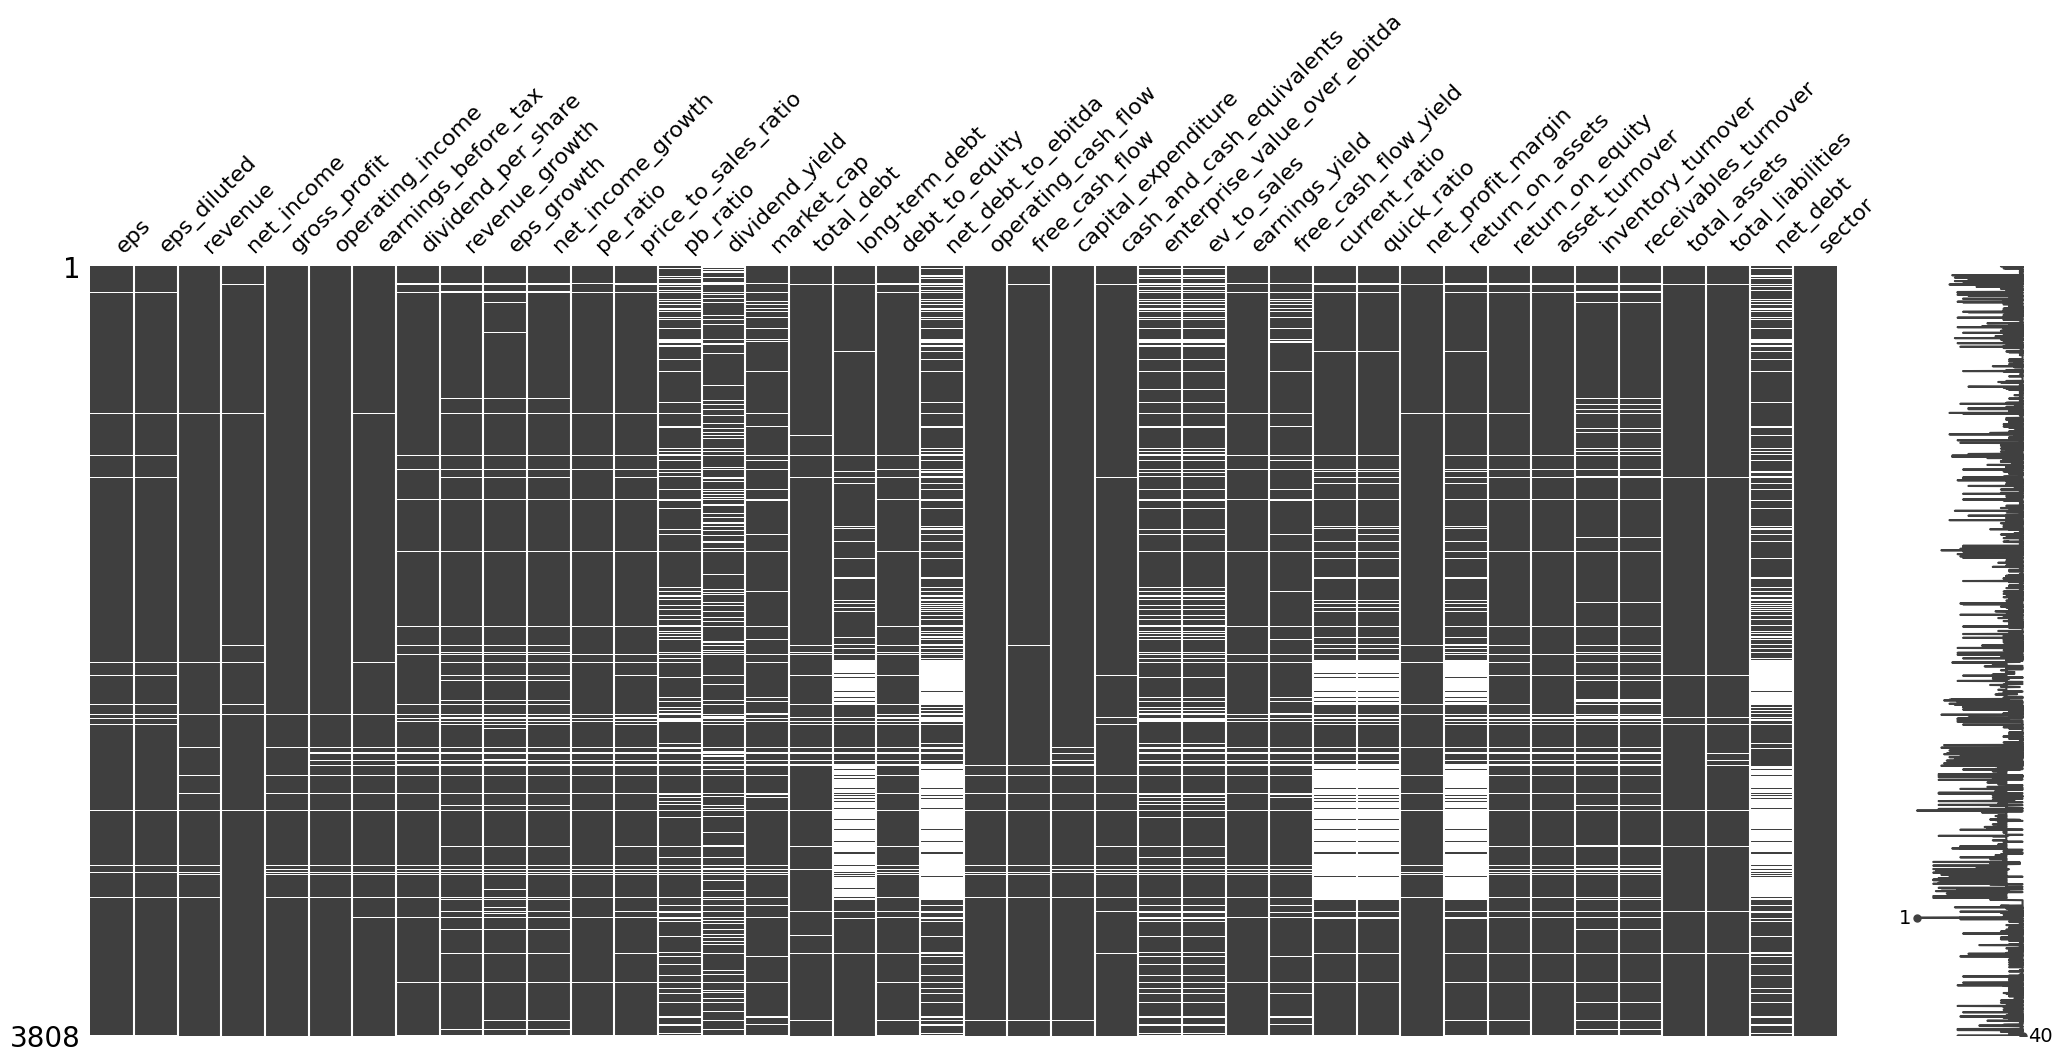

In [65]:
# Visualize the missingness pattern
msno.matrix(predictors2014_selected)

<Axes: >

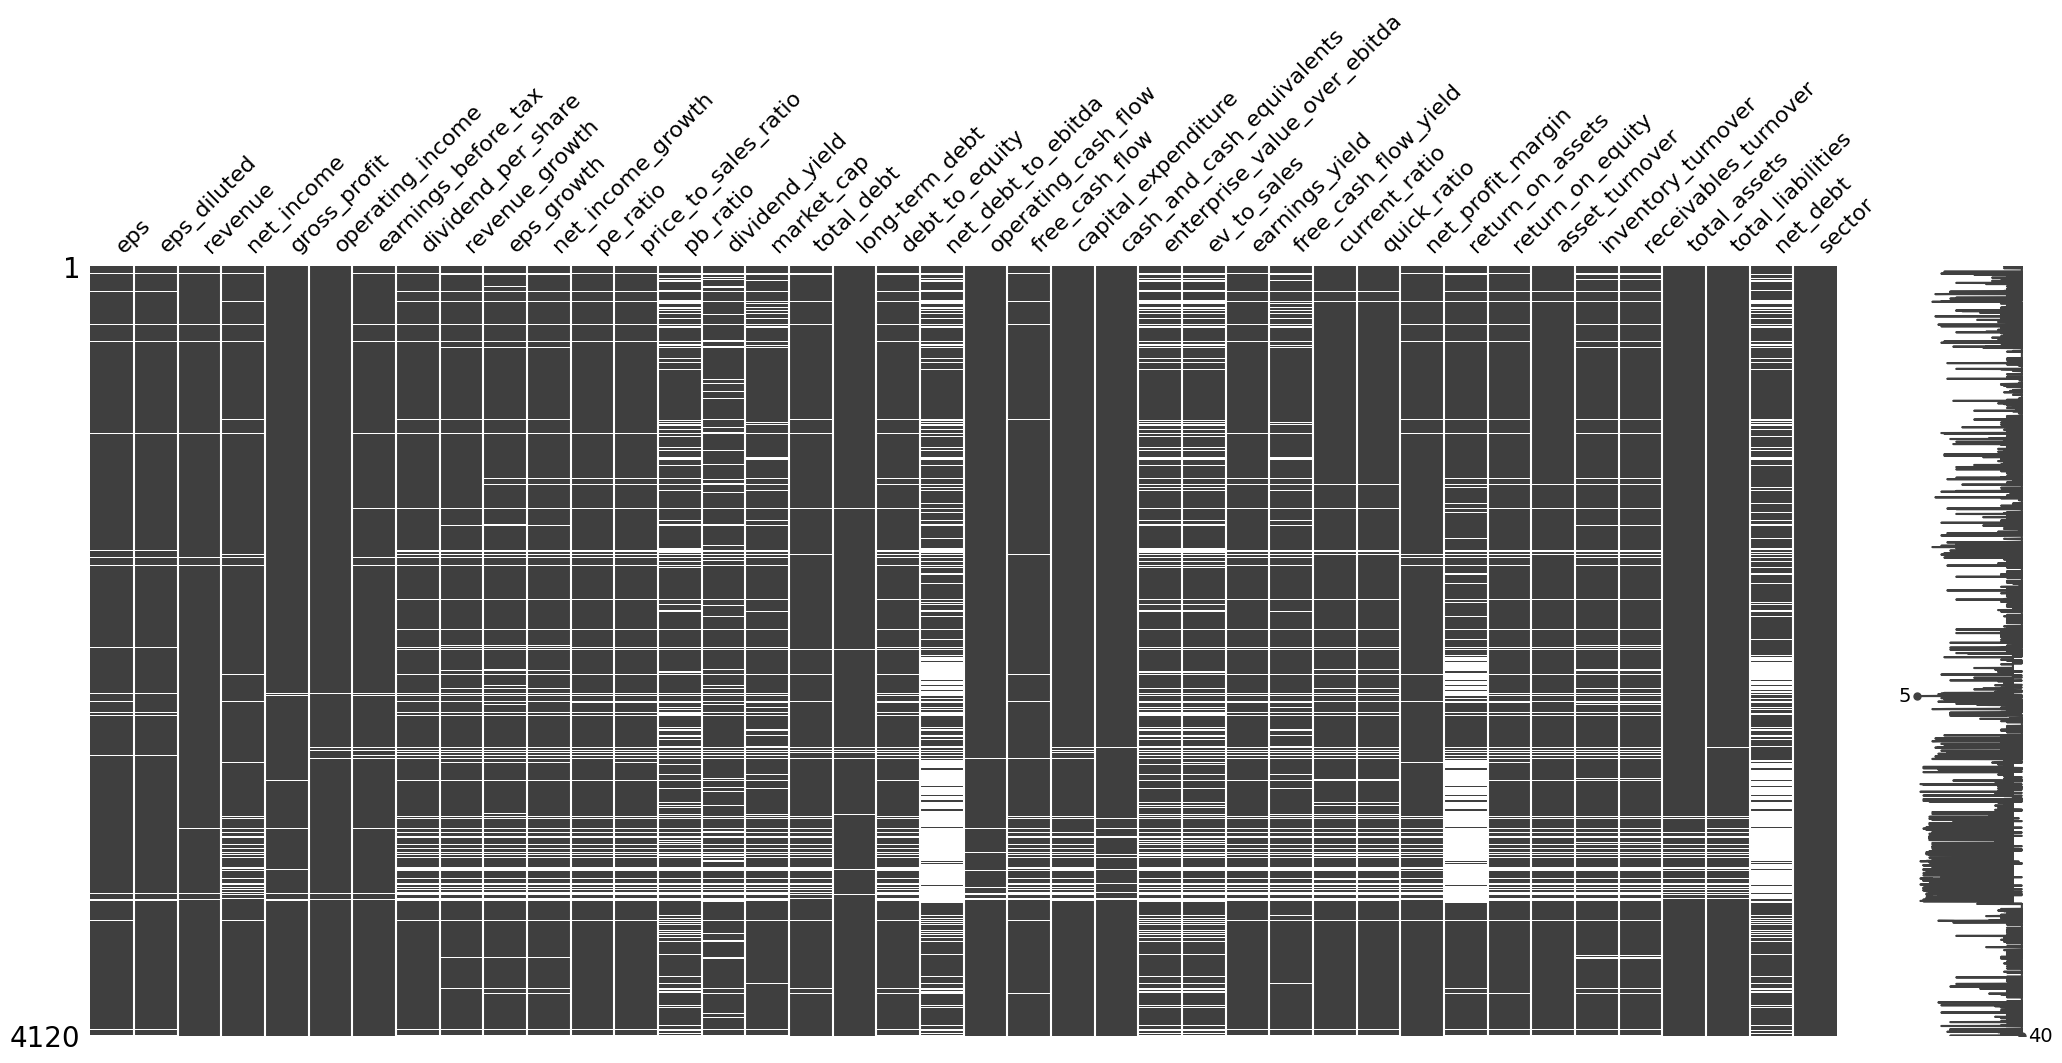

In [66]:
msno.matrix(predictors2015_selected)

<Axes: >

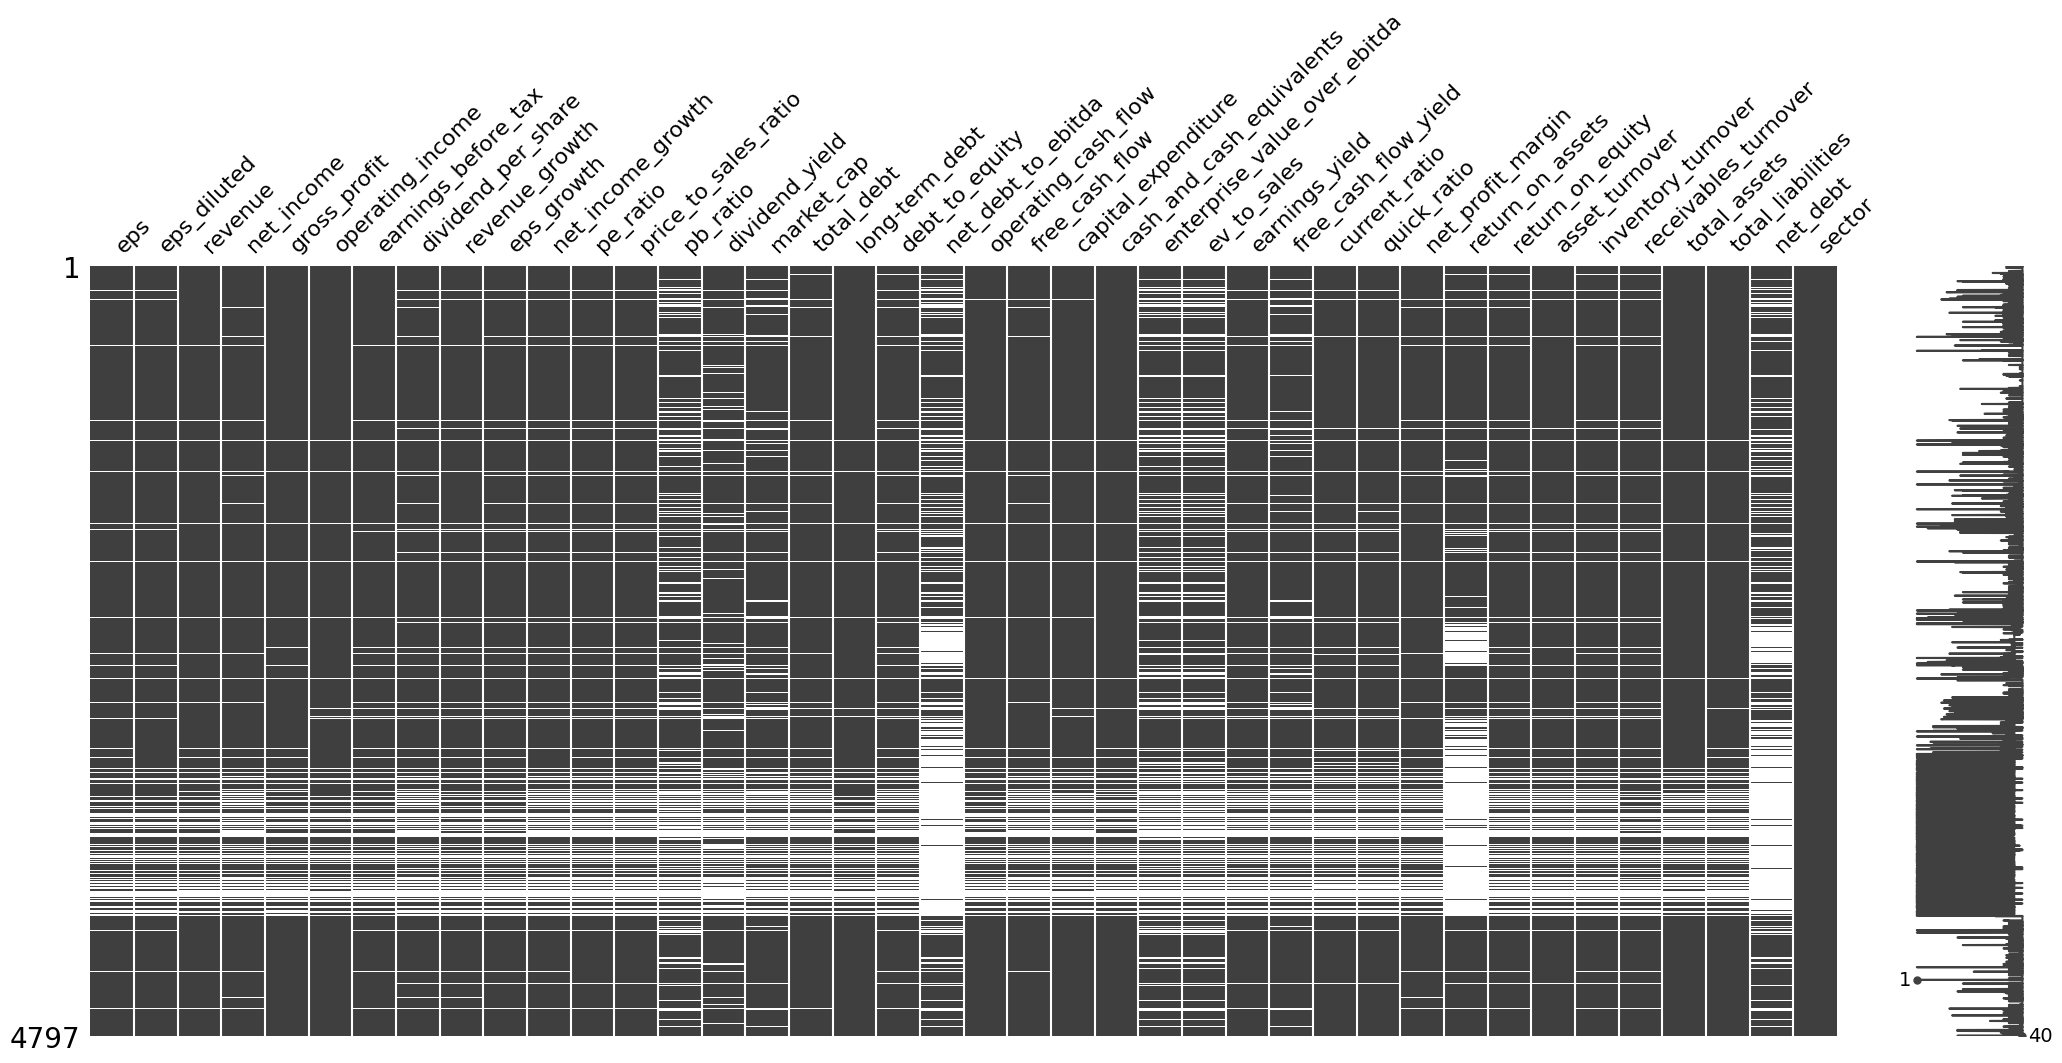

In [67]:
msno.matrix(predictors2016_selected)

<Axes: >

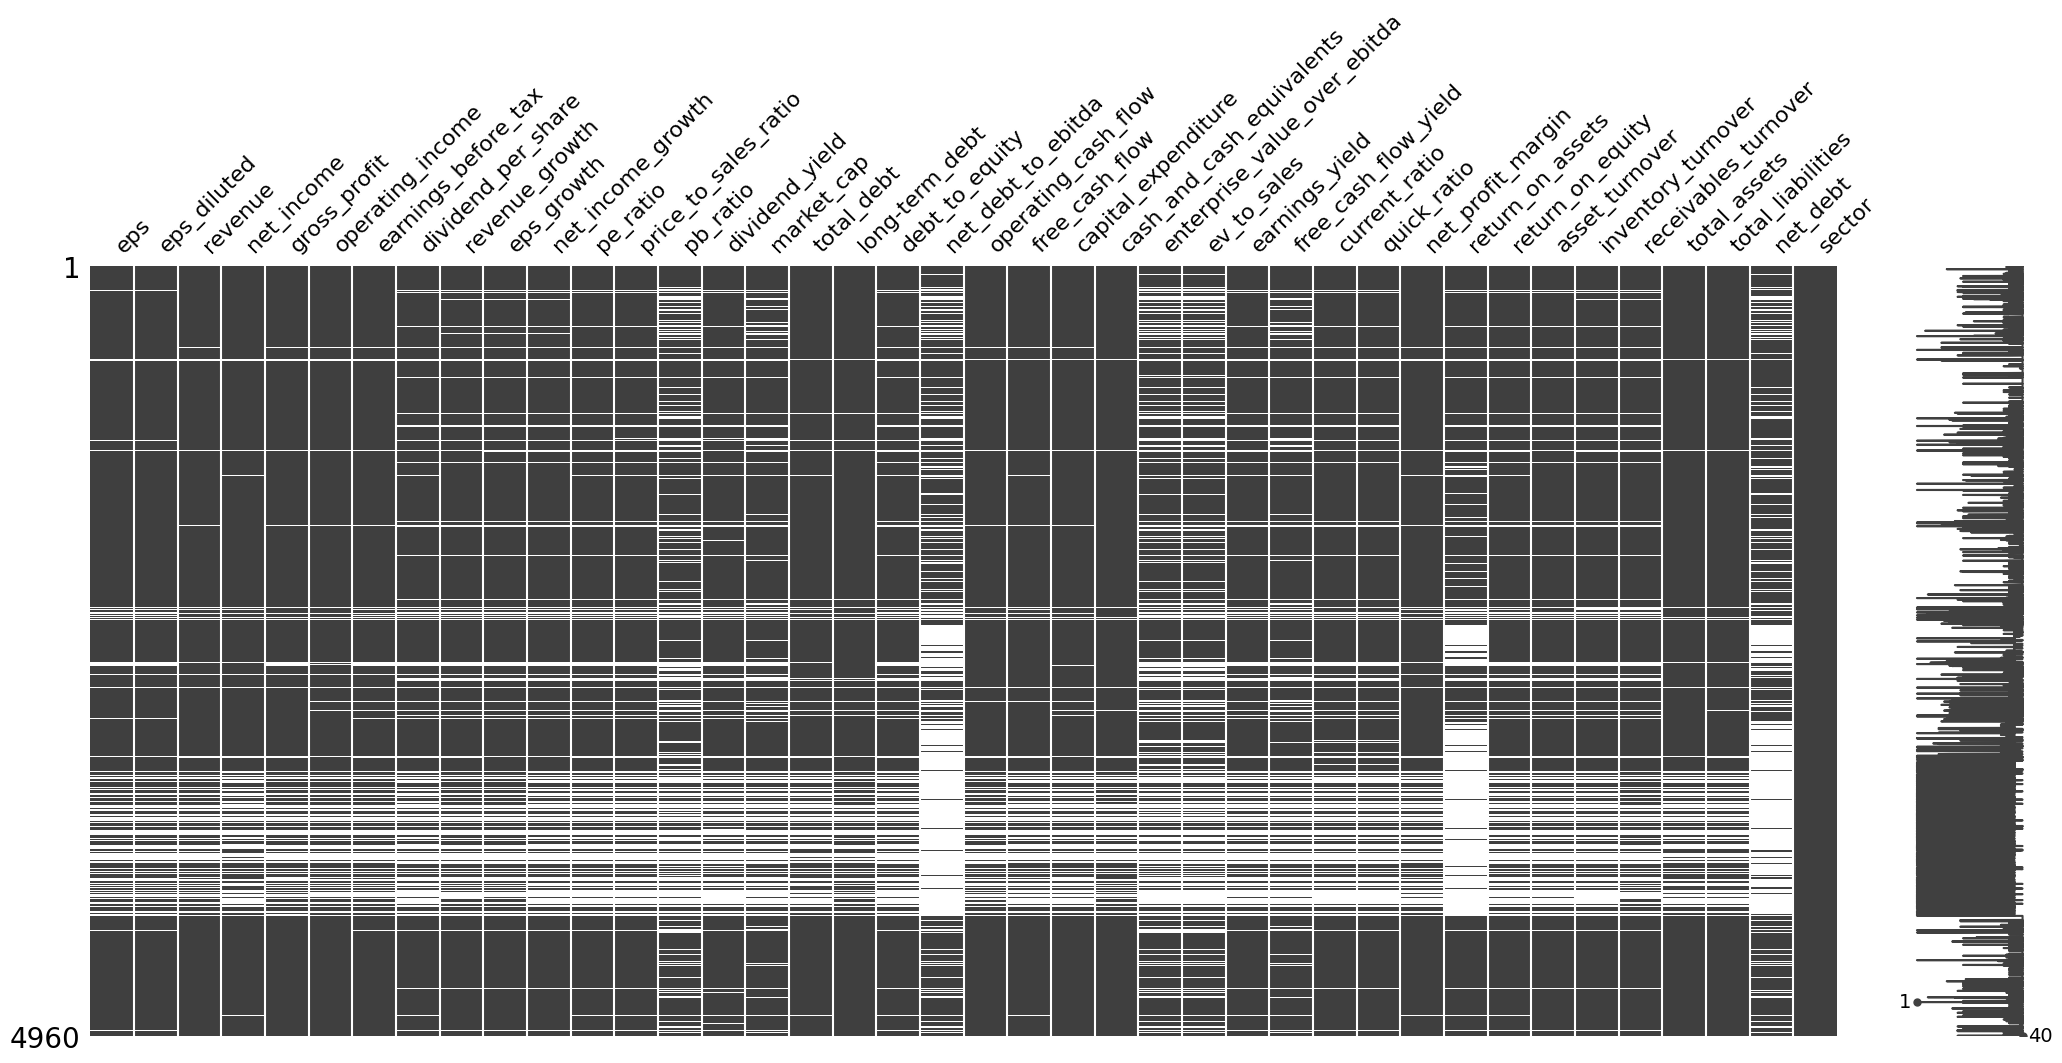

In [68]:
msno.matrix(predictors2017_selected)

<Axes: >

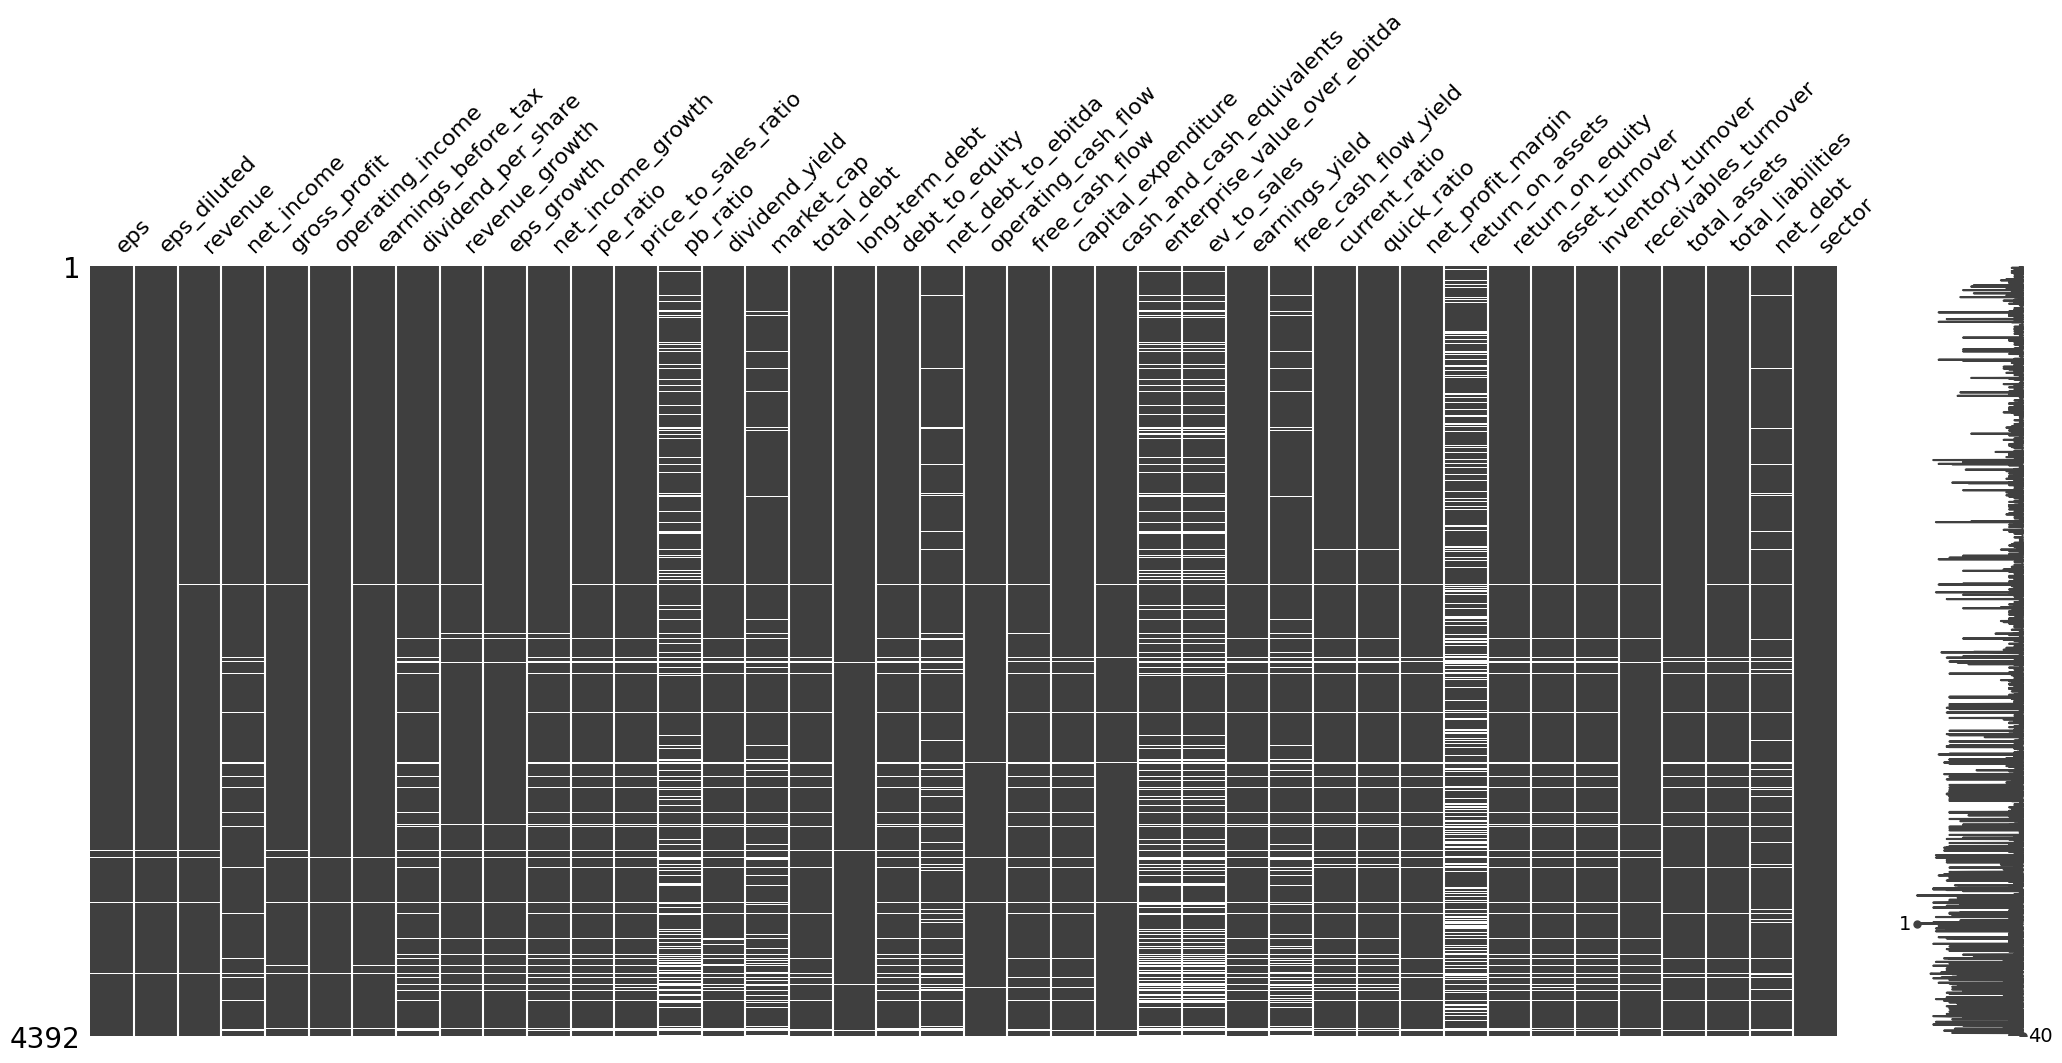

In [69]:
msno.matrix(predictors2018_selected)

<Axes: >

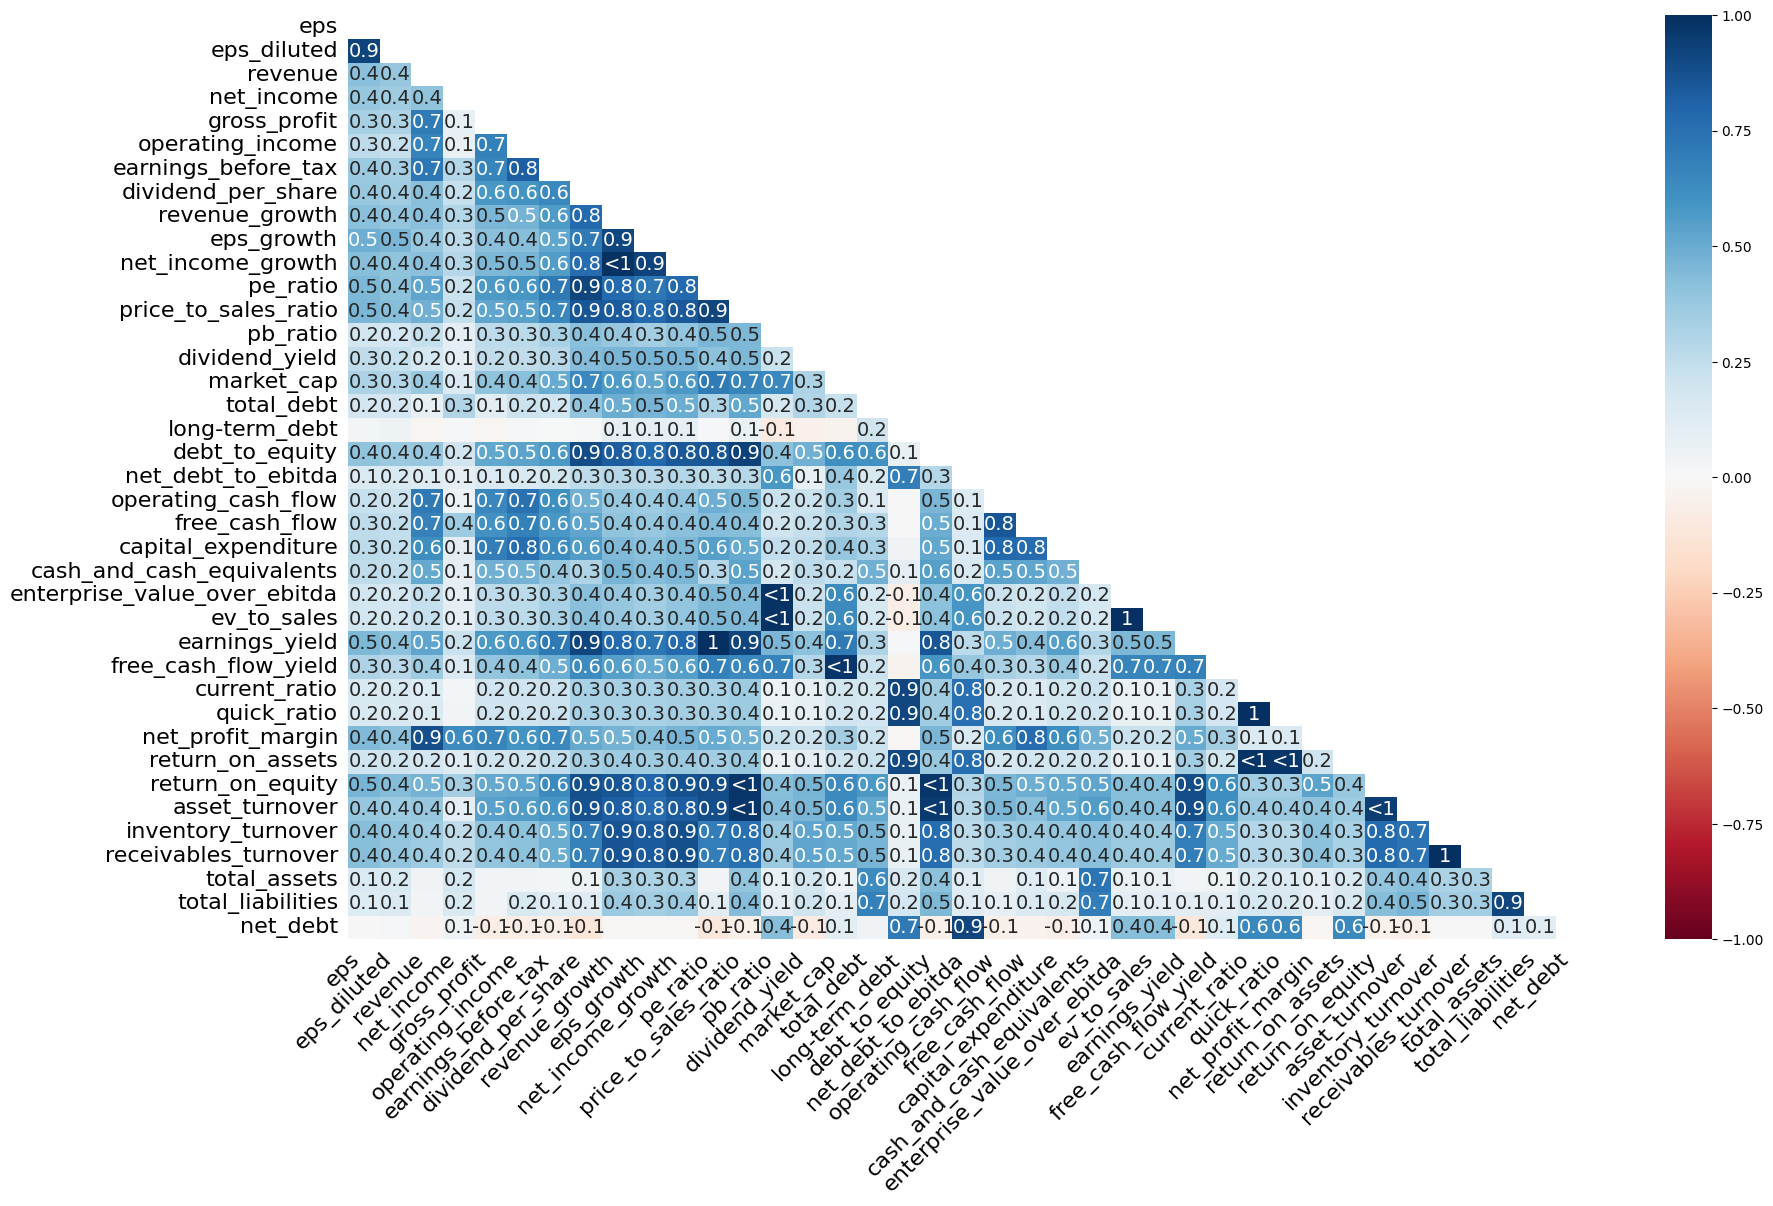

In [70]:
msno.heatmap(predictors2014_selected)

<Axes: >

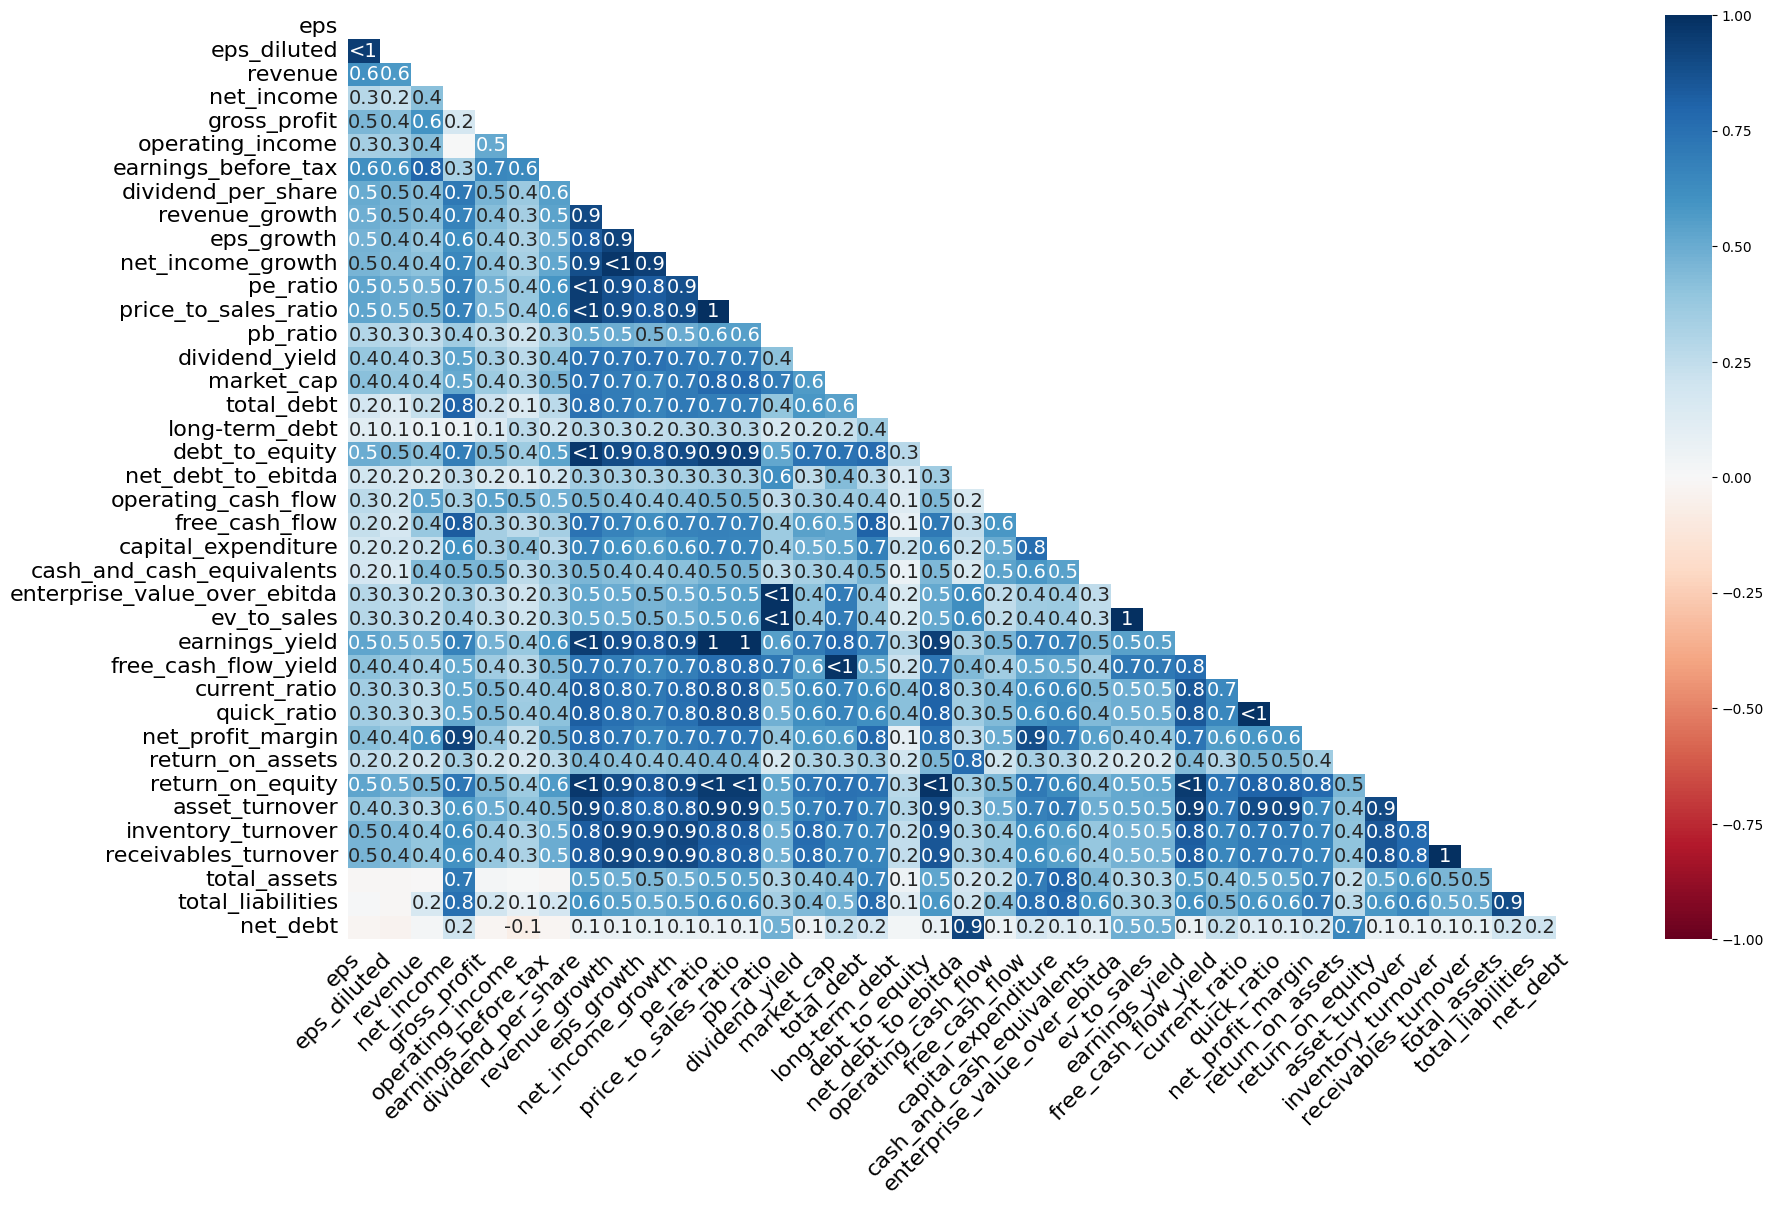

In [71]:
msno.heatmap(predictors2015_selected)

<Axes: >

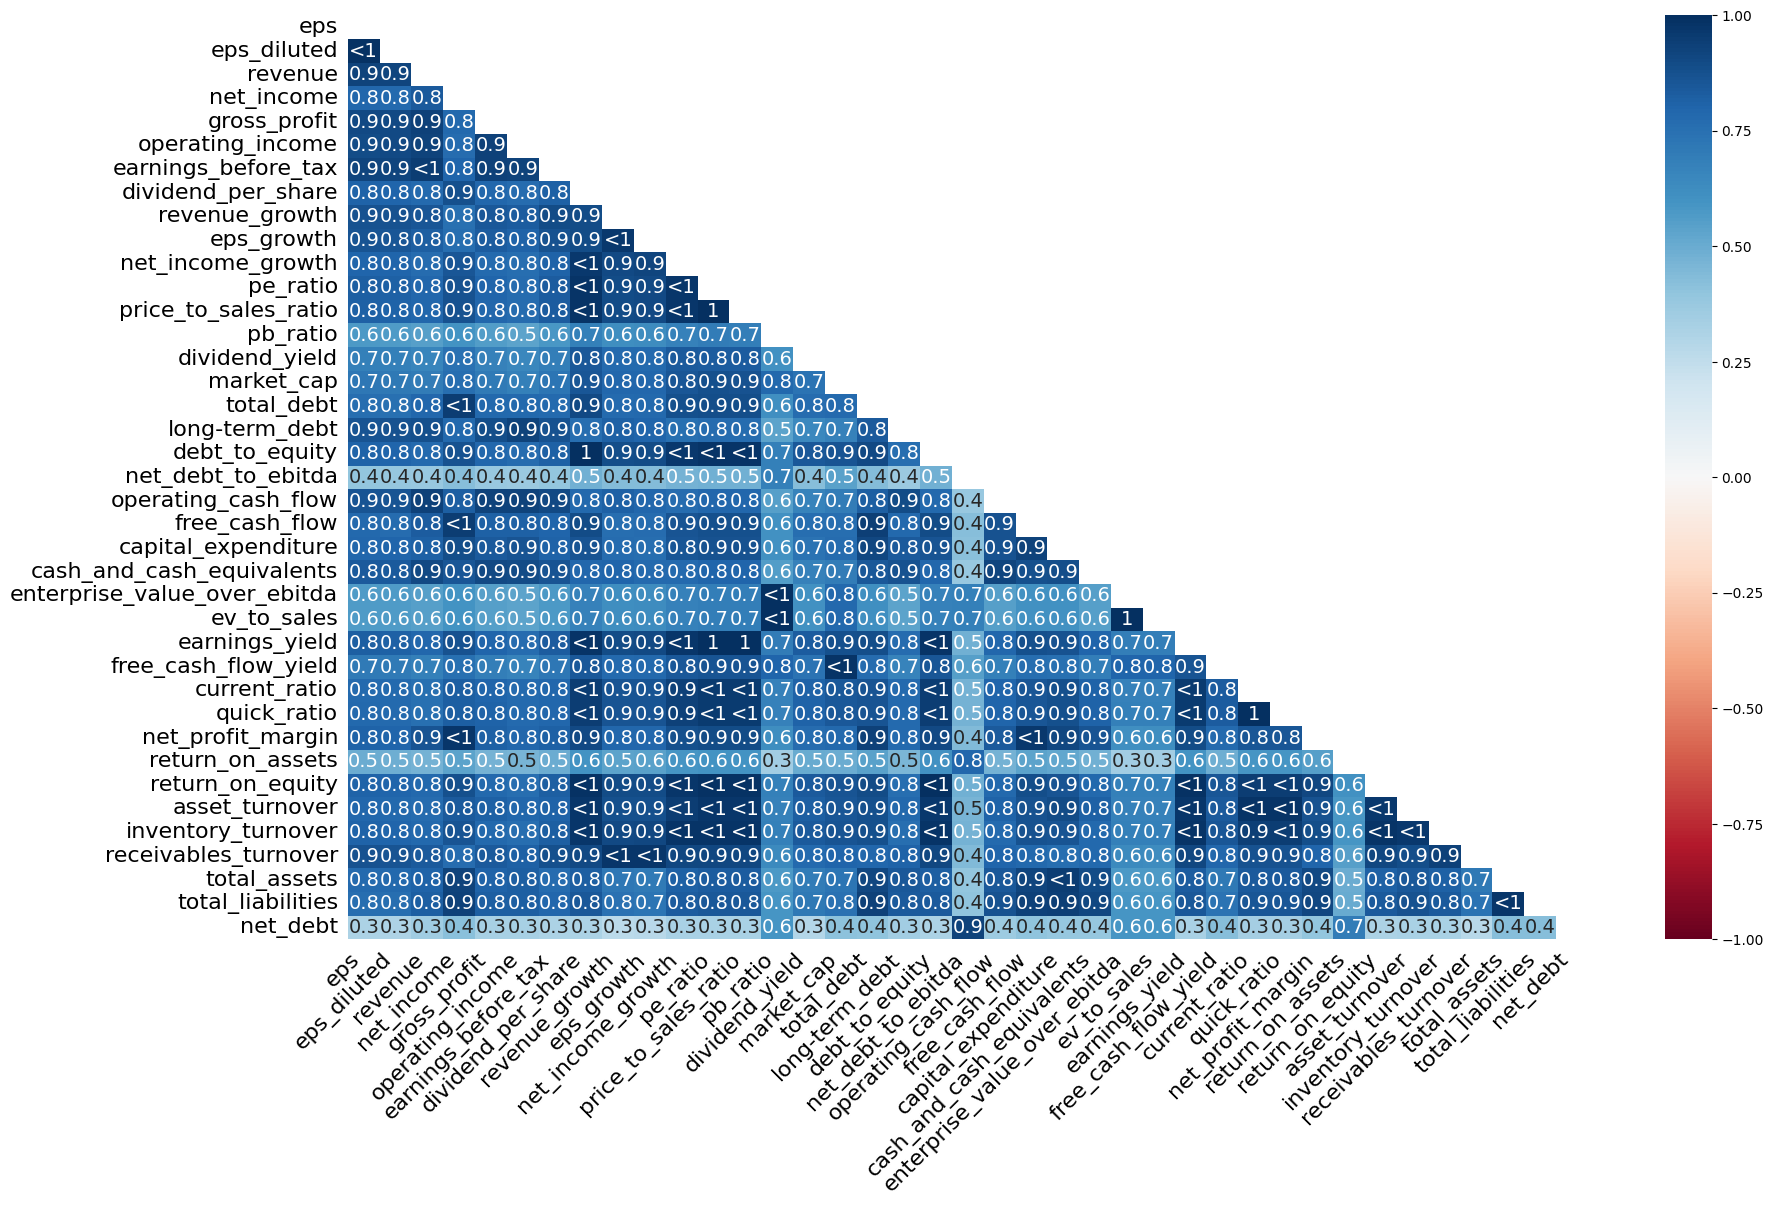

In [72]:
msno.heatmap(predictors2016_selected)

<Axes: >

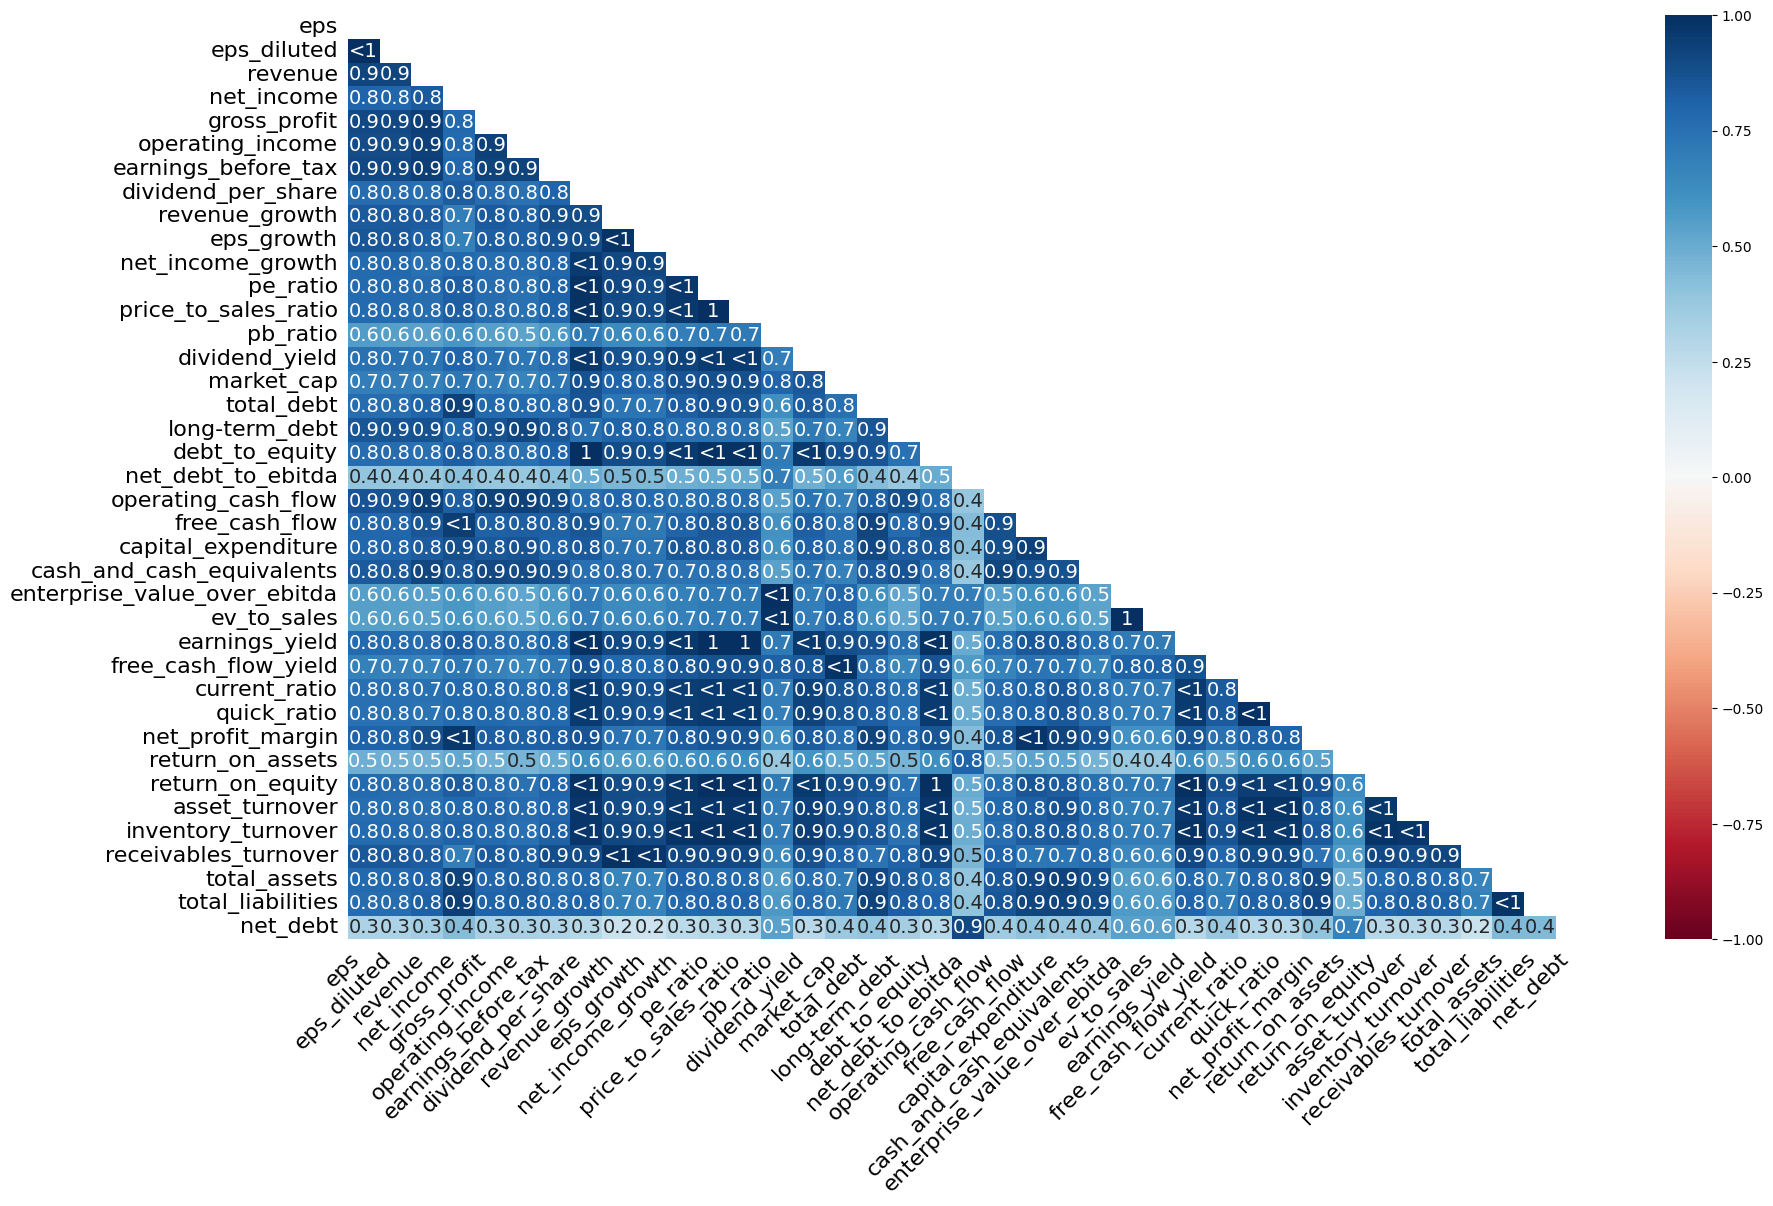

In [73]:
msno.heatmap(predictors2017_selected)

<Axes: >

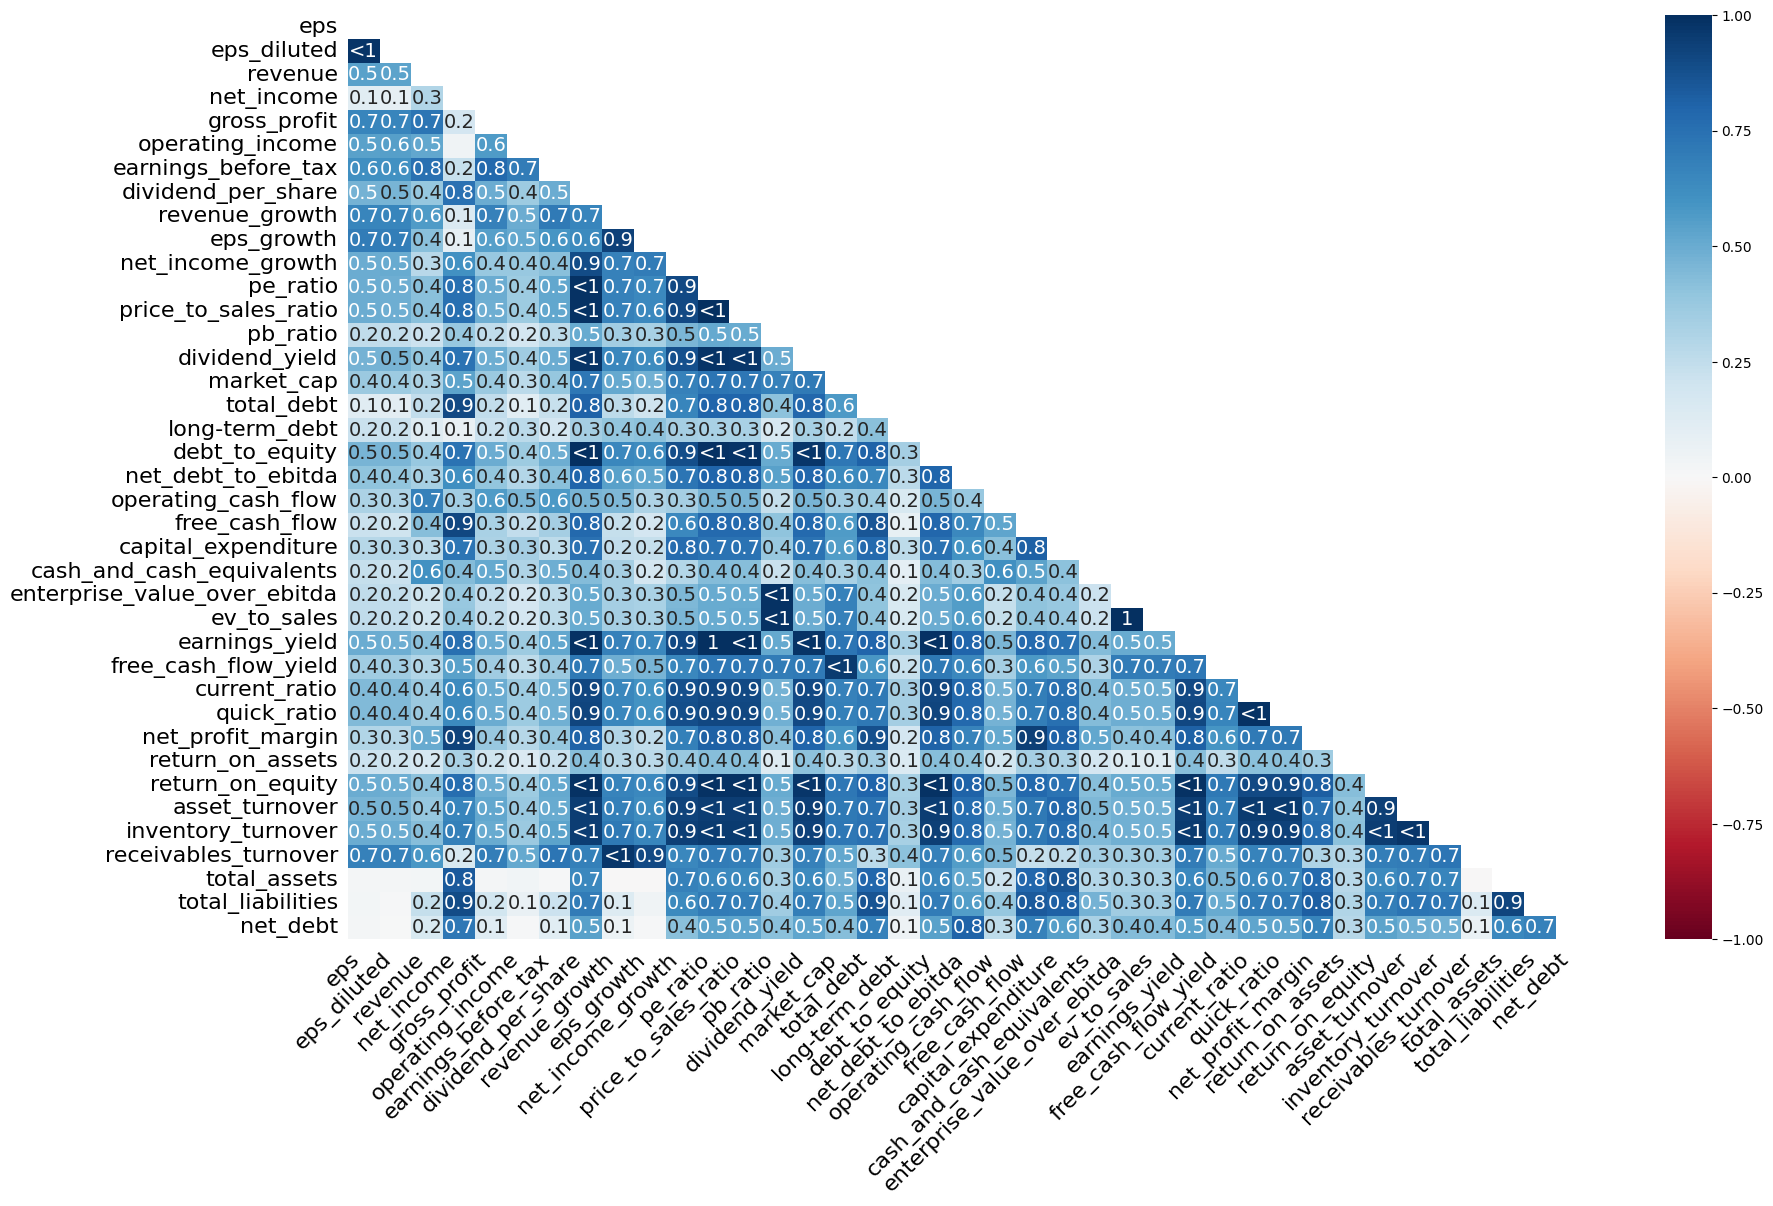

In [74]:
msno.heatmap(predictors2018_selected)

#### Dropping Predictors with $> 41\%$ Missingness

After dropping, we only have $39$ predictors left.

In [75]:
predictor2014_dropped = predictors2014_selected.drop('net_debt_to_ebitda', axis=1)
predictor2015_dropped = predictors2015_selected.drop('net_debt_to_ebitda', axis=1)
predictor2016_dropped = predictors2016_selected.drop('net_debt_to_ebitda', axis=1)
predictor2017_dropped = predictors2017_selected.drop('net_debt_to_ebitda', axis=1)
predictor2018_dropped = predictors2018_selected.drop('net_debt_to_ebitda', axis=1)

### Train Test Set Split

We split the data into training and testing sets first to ensure that the model is evaluated on data it hasn't seen during training.

In [76]:
# Split the data into training and test sets
X_2014_train, X_2014_test, y_2014_train, y_2014_test = train_test_split(predictor2014_dropped, 
                                                                        price_var2014, 
                                                                        test_size=0.2, 
                                                                        random_state=42)

X_2015_train, X_2015_test, y_2015_train, y_2015_test = train_test_split(predictor2015_dropped, 
                                                                        price_var2015, 
                                                                        test_size=0.2, 
                                                                        random_state=42)

X_2016_train, X_2016_test, y_2016_train, y_2016_test = train_test_split(predictor2016_dropped, 
                                                                        price_var2016, 
                                                                        test_size=0.2, 
                                                                        random_state=42)

X_2017_train, X_2017_test, y_2017_train, y_2017_test = train_test_split(predictor2017_dropped, 
                                                                        price_var2017, 
                                                                        test_size=0.2, 
                                                                        random_state=42)

X_2018_train, X_2018_test, y_2018_train, y_2018_test = train_test_split(predictor2018_dropped, 
                                                                        price_var2018, 
                                                                        test_size=0.2, 
                                                                        random_state=42)

### Data Scaling

We first scale the data (numerical predictors) as they are on very different scales. Since K-NN is a distance based algorith, scaling before imputing is better.

In [78]:
def scale_train_test(X_train, X_test):
    """
    Scales the numerical columns of training and test sets and combines them back 
    with the categorical data.

    Parameters:
    X_train (pd.DataFrame): The training set DataFrame.
    X_test (pd.DataFrame): The test set DataFrame.

    Returns:
    pd.DataFrame, pd.DataFrame: Scaled versions of X_train and X_test.
    """
    # Identify numerical columns
    numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

    # Separate numerical and categorical data
    X_train_numerical = X_train[numerical_cols]
    X_train_categorical = X_train.drop(columns=numerical_cols)
    X_test_numerical = X_test[numerical_cols]
    X_test_categorical = X_test.drop(columns=numerical_cols)

    # Fit the scaler using only the training data
    scaler = StandardScaler().fit(X_train_numerical)

    # Apply the scaler to the numerical data
    X_train_numerical_scaled = scaler.transform(X_train_numerical)
    X_test_numerical_scaled = scaler.transform(X_test_numerical)

    # Convert the scaled arrays back to pandas DataFrame
    X_train_numerical_scaled_df = pd.DataFrame(X_train_numerical_scaled, columns=numerical_cols, index=X_train.index)
    X_test_numerical_scaled_df = pd.DataFrame(X_test_numerical_scaled, columns=numerical_cols, index=X_test.index)

    # Combine the scaled numerical data with the original categorical data
    X_train_scaled = pd.concat([X_train_numerical_scaled_df, X_train_categorical], axis=1)
    X_test_scaled = pd.concat([X_test_numerical_scaled_df, X_test_categorical], axis=1)

    return X_train_scaled, X_test_scaled, scaler


In [79]:
# Scale the train and test sets
X_2014_train_scaled, X_2014_test_scaled, X_2014_scaler = scale_train_test(X_2014_train, X_2014_test)
X_2015_train_scaled, X_2015_test_scaled, X_2015_scaler = scale_train_test(X_2015_train, X_2015_test)
X_2016_train_scaled, X_2016_test_scaled, X_2016_scaler = scale_train_test(X_2016_train, X_2016_test)
X_2017_train_scaled, X_2017_test_scaled, X_2017_scaler = scale_train_test(X_2017_train, X_2017_test)
X_2018_train_scaled, X_2018_test_scaled, X_2018_scaler = scale_train_test(X_2018_train, X_2018_test)

### K-NN Imputation

From the previous examination we found that the only categorical predictor `sector` doesn't have missing values. Hence, for imputation, we only have to focus on imputating the numerical predictors.

In [80]:
def separate_and_impute(X_train, X_test, n_neighbors=5):
    """
    Separates the numerical and categorical columns, applies KNN imputation to the 
    numerical columns, and then combines them back with the categorical data.

    Parameters:
    X_train (pd.DataFrame): The training set DataFrame.
    X_test (pd.DataFrame): The test set DataFrame.
    n_neighbors (int): The number of neighbors to use for KNN imputation.

    Returns:
    pd.DataFrame, pd.DataFrame: Imputed versions of X_train and X_test.
    """
    # Identify numerical columns
    numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

    # Separate numerical and categorical data
    X_train_num = X_train[numerical_cols]
    X_train_cat = X_train.drop(columns=numerical_cols)
    X_test_num = X_test[numerical_cols]
    X_test_cat = X_test.drop(columns=numerical_cols)

    # Initialize and fit the KNN imputer
    knn_imputer = KNNImputer(n_neighbors=n_neighbors)
    X_train_num_imputed = knn_imputer.fit_transform(X_train_num)
    X_test_num_imputed = knn_imputer.transform(X_test_num)

    # Convert the imputed arrays back to pandas DataFrames
    X_train_num_imputed_df = pd.DataFrame(X_train_num_imputed, columns=X_train_num.columns)
    X_test_num_imputed_df = pd.DataFrame(X_test_num_imputed, columns=X_test_num.columns)

    # Combine the imputed numerical data with the original categorical data
    X_train_imputed = pd.concat([X_train_num_imputed_df, X_train_cat.reset_index(drop=True)], axis=1)
    X_test_imputed = pd.concat([X_test_num_imputed_df, X_test_cat.reset_index(drop=True)], axis=1)

    return X_train_imputed, X_test_imputed

In [81]:
X_2014_train_scaled_imp, X_2014_test_scaled_imp = separate_and_impute(X_2014_train_scaled, X_2014_test_scaled)
X_2015_train_scaled_imp, X_2015_test_scaled_imp = separate_and_impute(X_2015_train_scaled, X_2015_test_scaled)
X_2016_train_scaled_imp, X_2016_test_scaled_imp = separate_and_impute(X_2016_train_scaled, X_2016_test_scaled)
X_2017_train_scaled_imp, X_2017_test_scaled_imp = separate_and_impute(X_2017_train_scaled, X_2017_test_scaled)
X_2018_train_scaled_imp, X_2018_test_scaled_imp = separate_and_impute(X_2018_train_scaled, X_2018_test_scaled)

In [82]:
X_2014_train_scaled_imp.isnull().sum()

eps                             0
eps_diluted                     0
revenue                         0
net_income                      0
gross_profit                    0
operating_income                0
earnings_before_tax             0
dividend_per_share              0
revenue_growth                  0
eps_growth                      0
net_income_growth               0
pe_ratio                        0
price_to_sales_ratio            0
pb_ratio                        0
dividend_yield                  0
market_cap                      0
total_debt                      0
long-term_debt                  0
debt_to_equity                  0
operating_cash_flow             0
free_cash_flow                  0
capital_expenditure             0
cash_and_cash_equivalents       0
enterprise_value_over_ebitda    0
ev_to_sales                     0
earnings_yield                  0
free_cash_flow_yield            0
current_ratio                   0
quick_ratio                     0
net_profit_mar

In [83]:
X_2014_test_scaled_imp.isnull().sum()

eps                             0
eps_diluted                     0
revenue                         0
net_income                      0
gross_profit                    0
operating_income                0
earnings_before_tax             0
dividend_per_share              0
revenue_growth                  0
eps_growth                      0
net_income_growth               0
pe_ratio                        0
price_to_sales_ratio            0
pb_ratio                        0
dividend_yield                  0
market_cap                      0
total_debt                      0
long-term_debt                  0
debt_to_equity                  0
operating_cash_flow             0
free_cash_flow                  0
capital_expenditure             0
cash_and_cash_equivalents       0
enterprise_value_over_ebitda    0
ev_to_sales                     0
earnings_yield                  0
free_cash_flow_yield            0
current_ratio                   0
quick_ratio                     0
net_profit_mar

In [84]:
X_2015_train_scaled_imp.isnull().sum()

eps                             0
eps_diluted                     0
revenue                         0
net_income                      0
gross_profit                    0
operating_income                0
earnings_before_tax             0
dividend_per_share              0
revenue_growth                  0
eps_growth                      0
net_income_growth               0
pe_ratio                        0
price_to_sales_ratio            0
pb_ratio                        0
dividend_yield                  0
market_cap                      0
total_debt                      0
long-term_debt                  0
debt_to_equity                  0
operating_cash_flow             0
free_cash_flow                  0
capital_expenditure             0
cash_and_cash_equivalents       0
enterprise_value_over_ebitda    0
ev_to_sales                     0
earnings_yield                  0
free_cash_flow_yield            0
current_ratio                   0
quick_ratio                     0
net_profit_mar

In [85]:
X_2015_test_scaled_imp.isnull().sum()

eps                             0
eps_diluted                     0
revenue                         0
net_income                      0
gross_profit                    0
operating_income                0
earnings_before_tax             0
dividend_per_share              0
revenue_growth                  0
eps_growth                      0
net_income_growth               0
pe_ratio                        0
price_to_sales_ratio            0
pb_ratio                        0
dividend_yield                  0
market_cap                      0
total_debt                      0
long-term_debt                  0
debt_to_equity                  0
operating_cash_flow             0
free_cash_flow                  0
capital_expenditure             0
cash_and_cash_equivalents       0
enterprise_value_over_ebitda    0
ev_to_sales                     0
earnings_yield                  0
free_cash_flow_yield            0
current_ratio                   0
quick_ratio                     0
net_profit_mar

In [86]:
X_2016_train_scaled_imp.isnull().sum()

eps                             0
eps_diluted                     0
revenue                         0
net_income                      0
gross_profit                    0
operating_income                0
earnings_before_tax             0
dividend_per_share              0
revenue_growth                  0
eps_growth                      0
net_income_growth               0
pe_ratio                        0
price_to_sales_ratio            0
pb_ratio                        0
dividend_yield                  0
market_cap                      0
total_debt                      0
long-term_debt                  0
debt_to_equity                  0
operating_cash_flow             0
free_cash_flow                  0
capital_expenditure             0
cash_and_cash_equivalents       0
enterprise_value_over_ebitda    0
ev_to_sales                     0
earnings_yield                  0
free_cash_flow_yield            0
current_ratio                   0
quick_ratio                     0
net_profit_mar

In [87]:
X_2016_test_scaled_imp.isnull().sum()

eps                             0
eps_diluted                     0
revenue                         0
net_income                      0
gross_profit                    0
operating_income                0
earnings_before_tax             0
dividend_per_share              0
revenue_growth                  0
eps_growth                      0
net_income_growth               0
pe_ratio                        0
price_to_sales_ratio            0
pb_ratio                        0
dividend_yield                  0
market_cap                      0
total_debt                      0
long-term_debt                  0
debt_to_equity                  0
operating_cash_flow             0
free_cash_flow                  0
capital_expenditure             0
cash_and_cash_equivalents       0
enterprise_value_over_ebitda    0
ev_to_sales                     0
earnings_yield                  0
free_cash_flow_yield            0
current_ratio                   0
quick_ratio                     0
net_profit_mar

In [88]:
X_2017_train_scaled_imp.isnull().sum()

eps                             0
eps_diluted                     0
revenue                         0
net_income                      0
gross_profit                    0
operating_income                0
earnings_before_tax             0
dividend_per_share              0
revenue_growth                  0
eps_growth                      0
net_income_growth               0
pe_ratio                        0
price_to_sales_ratio            0
pb_ratio                        0
dividend_yield                  0
market_cap                      0
total_debt                      0
long-term_debt                  0
debt_to_equity                  0
operating_cash_flow             0
free_cash_flow                  0
capital_expenditure             0
cash_and_cash_equivalents       0
enterprise_value_over_ebitda    0
ev_to_sales                     0
earnings_yield                  0
free_cash_flow_yield            0
current_ratio                   0
quick_ratio                     0
net_profit_mar

In [89]:
X_2017_test_scaled_imp.isnull().sum()

eps                             0
eps_diluted                     0
revenue                         0
net_income                      0
gross_profit                    0
operating_income                0
earnings_before_tax             0
dividend_per_share              0
revenue_growth                  0
eps_growth                      0
net_income_growth               0
pe_ratio                        0
price_to_sales_ratio            0
pb_ratio                        0
dividend_yield                  0
market_cap                      0
total_debt                      0
long-term_debt                  0
debt_to_equity                  0
operating_cash_flow             0
free_cash_flow                  0
capital_expenditure             0
cash_and_cash_equivalents       0
enterprise_value_over_ebitda    0
ev_to_sales                     0
earnings_yield                  0
free_cash_flow_yield            0
current_ratio                   0
quick_ratio                     0
net_profit_mar

In [90]:
X_2018_train_scaled_imp.isnull().sum()

eps                             0
eps_diluted                     0
revenue                         0
net_income                      0
gross_profit                    0
operating_income                0
earnings_before_tax             0
dividend_per_share              0
revenue_growth                  0
eps_growth                      0
net_income_growth               0
pe_ratio                        0
price_to_sales_ratio            0
pb_ratio                        0
dividend_yield                  0
market_cap                      0
total_debt                      0
long-term_debt                  0
debt_to_equity                  0
operating_cash_flow             0
free_cash_flow                  0
capital_expenditure             0
cash_and_cash_equivalents       0
enterprise_value_over_ebitda    0
ev_to_sales                     0
earnings_yield                  0
free_cash_flow_yield            0
current_ratio                   0
quick_ratio                     0
net_profit_mar

In [91]:
X_2018_test_scaled_imp.isnull().sum()

eps                             0
eps_diluted                     0
revenue                         0
net_income                      0
gross_profit                    0
operating_income                0
earnings_before_tax             0
dividend_per_share              0
revenue_growth                  0
eps_growth                      0
net_income_growth               0
pe_ratio                        0
price_to_sales_ratio            0
pb_ratio                        0
dividend_yield                  0
market_cap                      0
total_debt                      0
long-term_debt                  0
debt_to_equity                  0
operating_cash_flow             0
free_cash_flow                  0
capital_expenditure             0
cash_and_cash_equivalents       0
enterprise_value_over_ebitda    0
ev_to_sales                     0
earnings_yield                  0
free_cash_flow_yield            0
current_ratio                   0
quick_ratio                     0
net_profit_mar

### One-Hot Encoding

In [101]:
X_2014_train_final = pd.get_dummies(X_2014_train_scaled_imp, columns=['sector'])
X_2014_test_final = pd.get_dummies(X_2014_train_scaled_imp, columns=['sector'])

X_2015_train_final = pd.get_dummies(X_2014_train_scaled_imp, columns=['sector'])
X_2015_test_final = pd.get_dummies(X_2014_train_scaled_imp, columns=['sector'])

X_2016_train_final = pd.get_dummies(X_2014_train_scaled_imp, columns=['sector'])
X_2016_test_final = pd.get_dummies(X_2014_train_scaled_imp, columns=['sector'])

X_2017_train_final = pd.get_dummies(X_2014_train_scaled_imp, columns=['sector'])
X_2017_test_final = pd.get_dummies(X_2014_train_scaled_imp, columns=['sector'])

X_2018_train_final = pd.get_dummies(X_2014_train_scaled_imp, columns=['sector'])
X_2018_test_final = pd.get_dummies(X_2014_train_scaled_imp, columns=['sector'])

### Principle Component Analysis (PCA)

<a id="project_organization"></a>

## Part 1: Stock Performance Prediction Model

[Return to contents](#contents)

### Cleaned Datasets Available

#### Predictors

**Scaled, imputed, not encoded**
* `X_2014_train_scaled_imp`
* `X_2014_test_scaled_imp`
* `X_2015_train_scaled_imp`
* `X_2015_test_scaled_imp`
* `X_2016_train_scaled_imp`
* `X_2016_test_scaled_imp`
* `X_2017_train_scaled_imp`
* `X_2017_test_scaled_imp`
* `X_2018_train_scaled_imp`
* `X_2018_test_scaled_imp`

**Scaled, imputed, encoded**
* `X_2014_train_final`
* `X_2014_test_final`
* `X_2015_train_final`
* `X_2015_test_final`
* `X_2016_train_final`
* `X_2016_test_final`
* `X_2017_train_final`
* `X_2017_test_final`
* `X_2018_train_final`
* `X_2018_test_final`

#### Target
* `class2014`
* `price_var2014`
* `class2015`
* `price_var2015`
* `class2016`
* `price_var2016`
* `class2017`
* `price_var2017`
* `class2018`
* `price_var2018`

### Simple Mean/Median Model (Baseline Model)

### Multiple Linear Regression

### Ridge Regression

### Lasso Regression

### Elastic Net Regression

### Random Forest Regressors

### Gradient Boosting

### Evaluation

<a id="project_organization"></a>

## Part 2: Network Analysis of Stock Market Interdependencies

[Return to contents](#contents)